In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
import numpy as np

O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais:

**CUST_ID:** Identificação do titular do cartão de crédito (categórica, ou seja, não possui valor numérico relevante para cálculos).

**BALANCE:** Saldo disponível na conta do cartão de crédito para realizar compras.

**BALANCE_FREQUENCY:** Com que frequência o saldo do cartão é atualizado (valor entre 0 e 1, onde 1 significa atualização frequente e 0 significa atualização rara).

**PURCHASES:** Valor total gasto em compras no período analisado.

**ONEOFF_PURCHASES:** Maior valor de uma única compra feita de uma só vez.

**INSTALLMENTS_PURCHASES:** Valor total de compras feitas parceladas.

**CASH_ADVANCE:** Valor total de dinheiro retirado como adiantamento no cartão de crédito (saques de crédito).

**PURCHASES_FREQUENCY:** Frequência com que as compras são realizadas (entre 0 e 1, sendo 1 = compras muito frequentes e 0 = compras raras).

**ONEOFFPURCHASESFREQUENCY:** Frequência das compras feitas de uma só vez (entre 0 e 1, sendo 1 = compras únicas frequentes e 0 = compras únicas raras).

**PURCHASESINSTALLMENTSFREQUENCY:** Frequência das compras parceladas (entre 0 e 1, sendo 1 = compras parceladas frequentes e 0 = compras parceladas raras).

**CASHADVANCEFREQUENCY:** Frequência com que o titular do cartão faz saques de crédito.

**CASHADVANCETRX:** Número de transações de saque de crédito realizadas.

**PURCHASES_TRX:** Número total de transações de compra feitas.

**CREDIT_LIMIT:** Limite de crédito disponível para o usuário.

**PAYMENTS:** Total de pagamentos feitos pelo usuário.

**MINIMUM_PAYMENTS:** Valor mínimo dos pagamentos feitos pelo usuário.

**PRCFULLPAYMENT:** Percentual de vezes em que o usuário quitou a fatura integralmente.

**TENURE:** Tempo de posse do cartão de crédito pelo usuário.


https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?select=CC+GENERAL.csv

In [2]:
# Configurar o número de casas decimais globalmente
pd.set_option('display.float_format', '{:.1f}'.format)

In [3]:
data = pd.read_csv("CC GENERAL.csv")
data

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001     40.9                0.8       95.4               0.0   
1     C10002   3202.5                0.9        0.0               0.0   
2     C10003   2495.1                1.0      773.2             773.2   
3     C10004   1666.7                0.6     1499.0            1499.0   
4     C10005    817.7                1.0       16.0              16.0   
...      ...      ...                ...        ...               ...   
8945  C19186     28.5                1.0      291.1               0.0   
8946  C19187     19.2                1.0      300.0               0.0   
8947  C19188     23.4                0.8      144.4               0.0   
8948  C19189     13.5                0.8        0.0               0.0   
8949  C19190    372.7                0.7     1093.2            1093.2   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       95.4           0.0                  0.2   
1                        0.0        6442.9                  0.0   
2                        0.0           0.0                  1.0   
3                        0.0         205.8                  0.1   
4                        0.0           0.0                  0.1   
...                      ...           ...                  ...   
8945                   291.1           0.0                  1.0   
8946                   300.0           0.0                  1.0   
8947                   144.4           0.0                  0.8   
8948                     0.0          36.6                  0.0   
8949                     0.0         127.0                  0.7   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                            0.0                               0.1   
1                            0.0                               0.0   
2                            1.0                               0.0   
3                            0.1                               0.0   
4                            0.1                               0.0   
...                          ...                               ...   
8945                         0.0                               0.8   
8946                         0.0                               0.8   
8947                         0.0                               0.7   
8948                         0.0                               0.0   
8949                         0.7                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                        0.0                 0              2        1000.0   
1                        0.2                 4              0        7000.0   
2                        0.0                 0             12        7500.0   
3                        0.1                 1              1        7500.0   
4                        0.0                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                     0.0                 0              6        1000.0   
8946                     0.0                 0              6        1000.0   
8947                     0.0                 0              5        1000.0   
8948                     0.2                 2              0         500.0   
8949                     0.3                 2             23        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        201.8             139.5               0.0      12  
1       4103.0            1072.3               0.2      12  
2        622.1             627.3               0.0      12  
3          0.0               NaN               0.0      12  
4        678.3             244.8               0.0      12  
...        ...               ...               ...     ...  
8945     325.6              48.9               0.5       6  
8946     275.9               NaN             

# Processo de Clusterização

### Pré Processamento dos Dados

In [4]:
cust_id = data['CUST_ID']

# Remover colunas desnecessárias
data.drop(columns=['CUST_ID'], inplace=True)  # ID não é relevante para clusters

# Tratar valores ausentes substituindo pela moda
data.fillna(data.mode().iloc[0], inplace=True)

# Normalizar os dados para que fiquem na mesma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

### Método do cotovelo

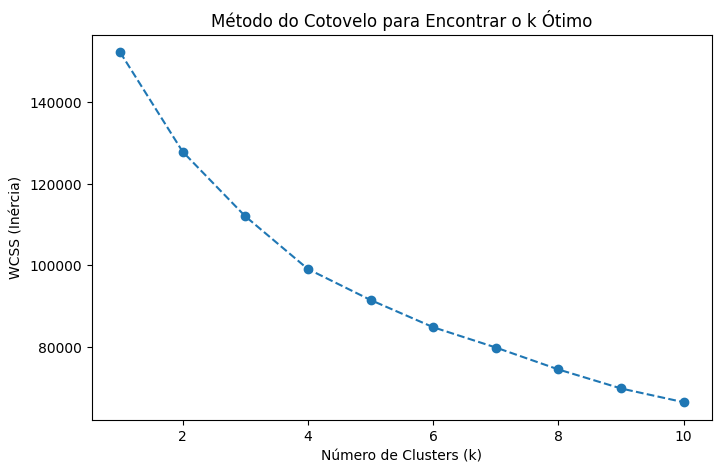

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inércia)')
plt.title('Método do Cotovelo para Encontrar o k Ótimo')
plt.show()

### Kernel PCA

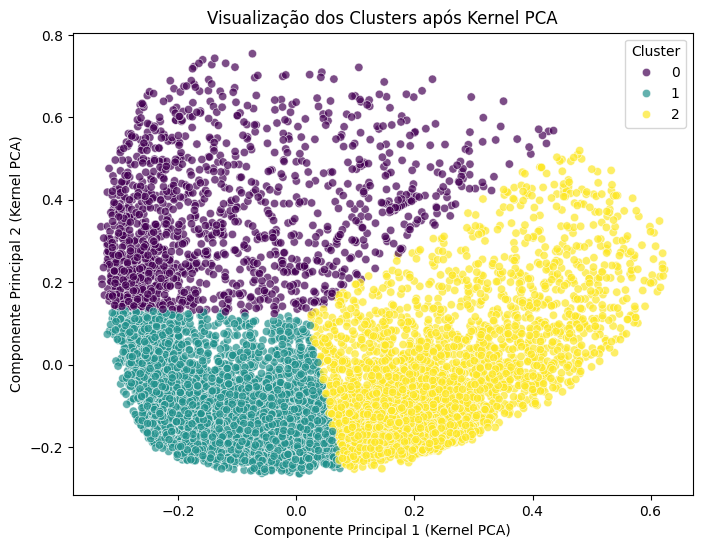

In [6]:
# 1. Aplicar Kernel PCA com kernel RBF
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01, eigen_solver='auto')  # Ajuste gamma se necessário
X_kpca = kpca.fit_transform(df_scaled)

# 2. Aplicar K-Means para encontrar os clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_kpca)

# 3. Criar um scatter plot dos dados reduzidos
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1 (Kernel PCA)')
plt.ylabel('Componente Principal 2 (Kernel PCA)')
plt.title('Visualização dos Clusters após Kernel PCA')
plt.legend(title='Cluster')
plt.show()

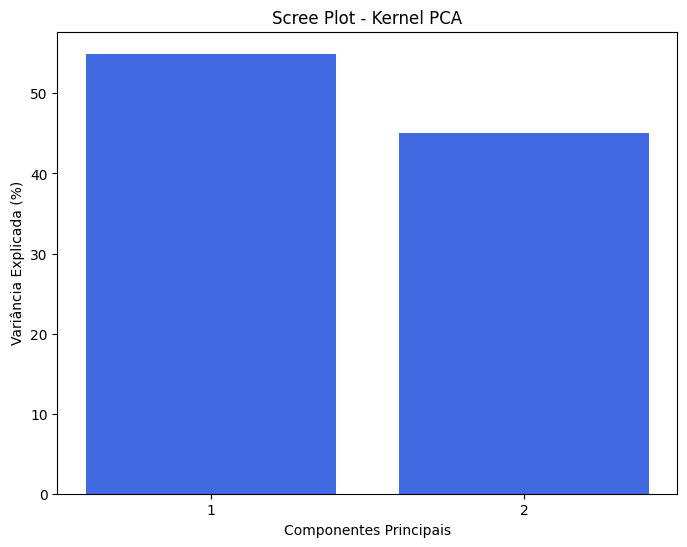

In [7]:
# 4. Obter os autovalores (lambdas)
lambdas = np.var(X_kpca, axis=0)  # Aproximação da variância explicada
explained_variance_ratio = lambdas / np.sum(lambdas)  # Normalizar para obter percentuais

# 5. Criar o gráfico de barras (Scree Plot)
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, color='royalblue')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada (%)')
plt.title('Scree Plot - Kernel PCA')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

In [8]:
# Criar uma cópia do dataset original para não modificar os dados originais
data_with_clusters = data.copy()

# Adicionar a coluna de clusters ao dataset e retornar com a coluna CUST_ID
data_with_clusters['Cluster'] = clusters
data_with_clusters['CUST_ID'] = cust_id

# Análise Estatística dos Clusters

### Cluster 0


📊 Estatísticas para BALANCE:

count    1435.0
mean     4528.8
std      2854.6
min         4.4
25%      2363.4
50%      4117.8
75%      6053.3
max     19043.1
Name: BALANCE, dtype: float64


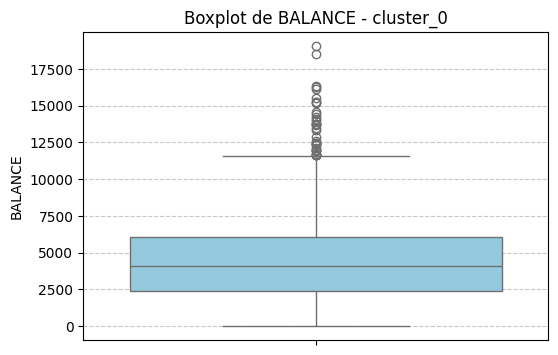

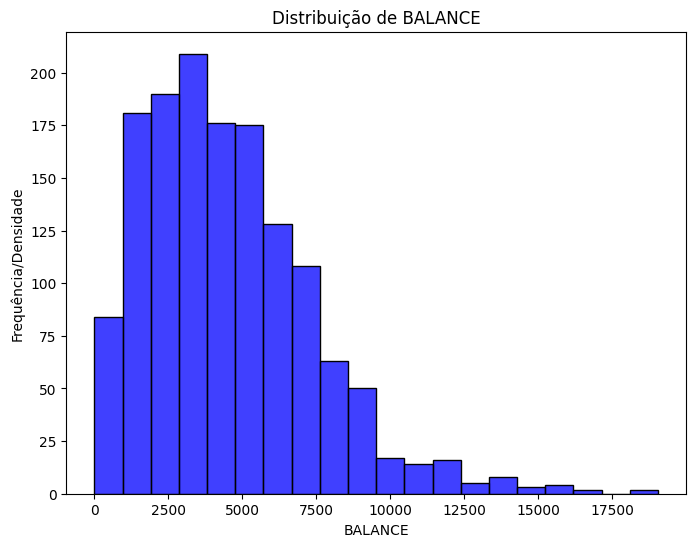


📊 Estatísticas para BALANCE_FREQUENCY:

count   1435.0
mean       1.0
std        0.1
min        0.1
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: BALANCE_FREQUENCY, dtype: float64


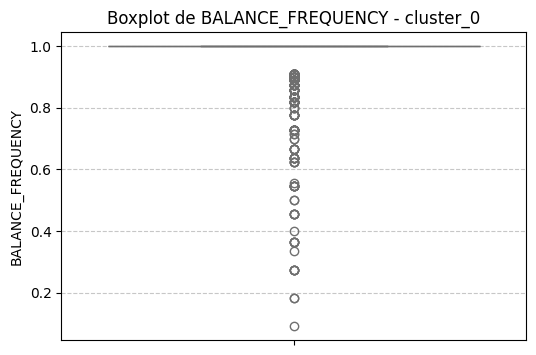

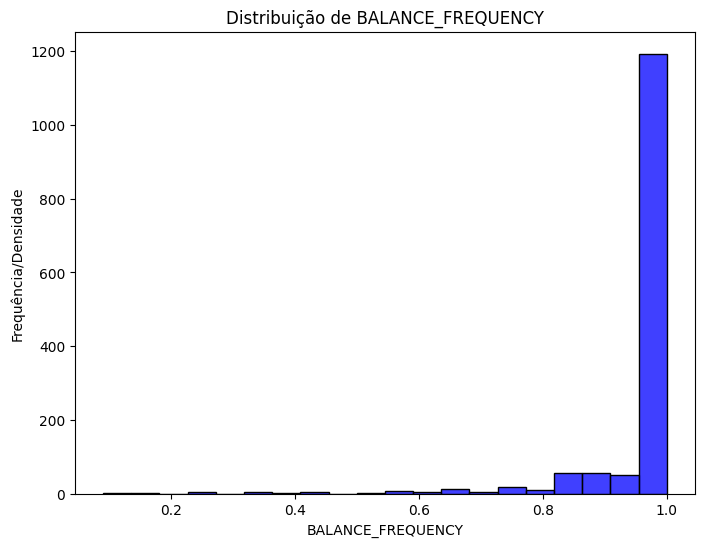


📊 Estatísticas para PURCHASES:

count    1435.0
mean     1185.8
std      3965.5
min         0.0
25%         0.0
50%       110.2
75%       805.1
max     49039.6
Name: PURCHASES, dtype: float64


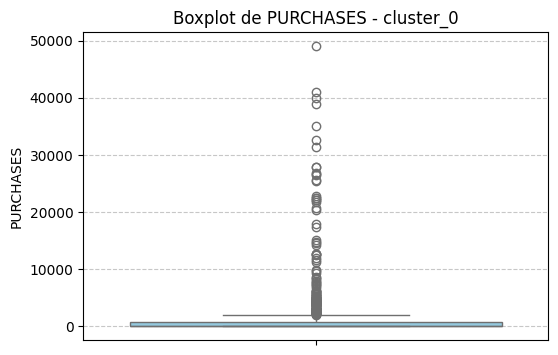

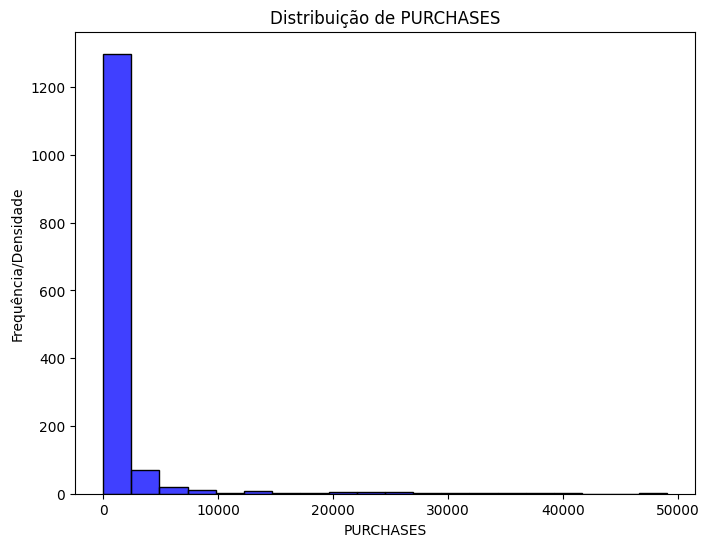


📊 Estatísticas para ONEOFF_PURCHASES:

count    1435.0
mean      801.6
std      3156.4
min         0.0
25%         0.0
50%         0.0
75%       432.9
max     40761.2
Name: ONEOFF_PURCHASES, dtype: float64


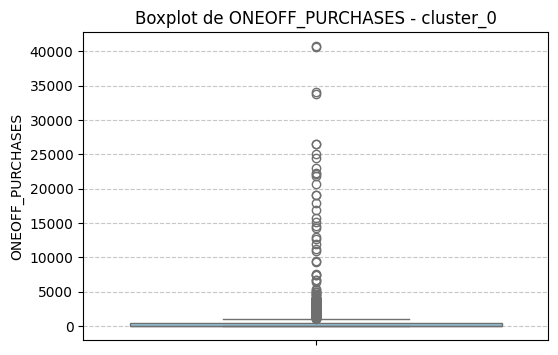

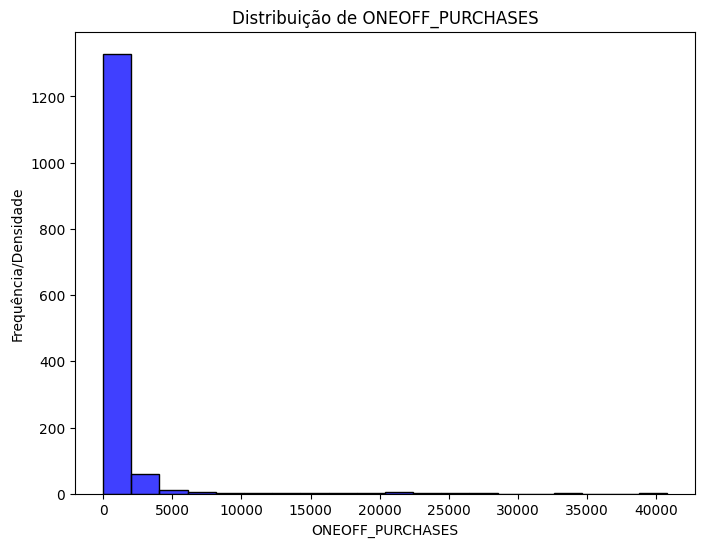


📊 Estatísticas para INSTALLMENTS_PURCHASES:

count    1435.0
mean      384.3
std      1463.6
min         0.0
25%         0.0
50%         0.0
75%       191.1
max     22500.0
Name: INSTALLMENTS_PURCHASES, dtype: float64


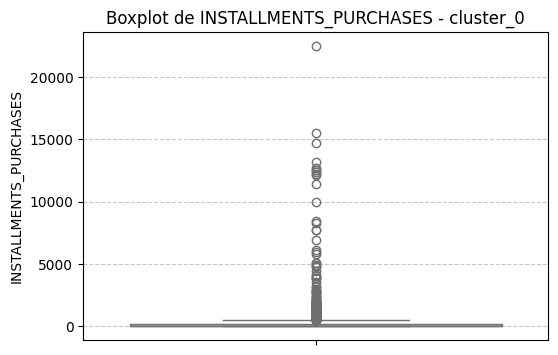

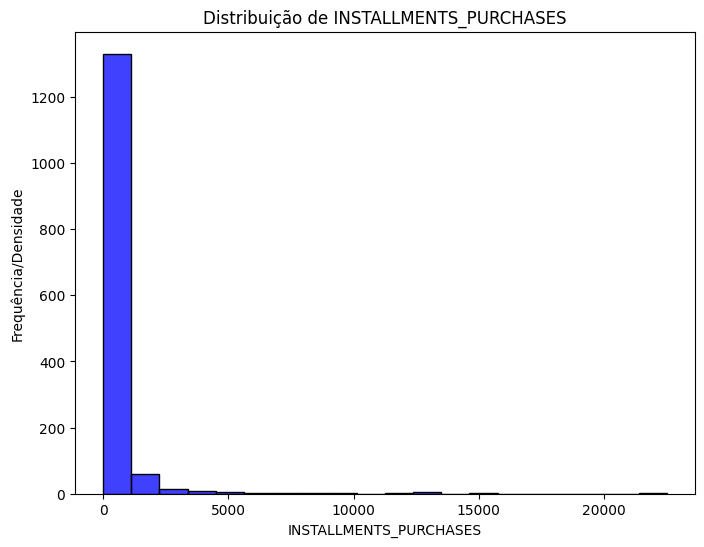


📊 Estatísticas para CASH_ADVANCE:

count    1435.0
mean     4085.5
std      3583.4
min         0.0
25%      1914.9
50%      3318.5
75%      5177.9
max     47137.2
Name: CASH_ADVANCE, dtype: float64


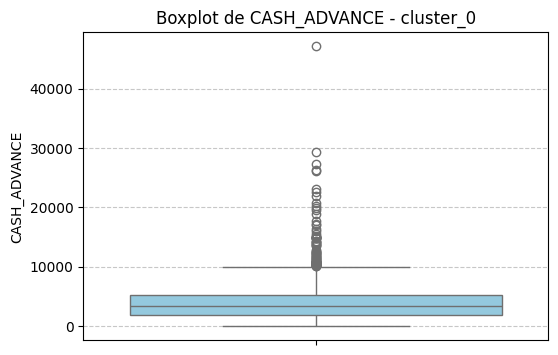

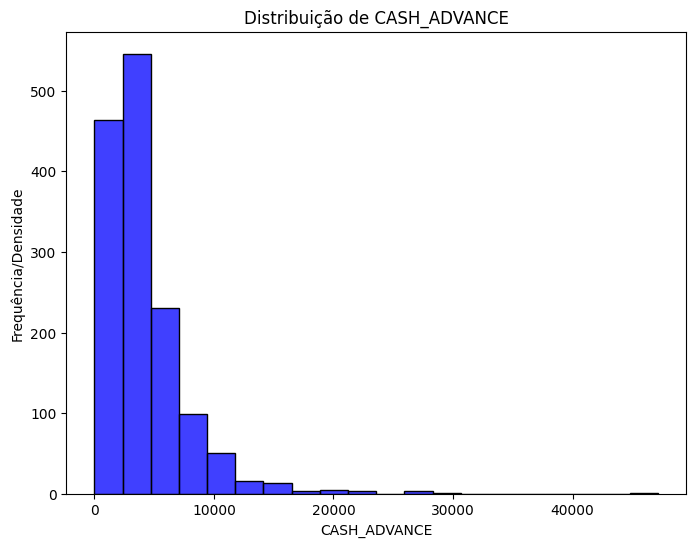


📊 Estatísticas para PURCHASES_FREQUENCY:

count   1435.0
mean       0.3
std        0.4
min        0.0
25%        0.0
50%        0.1
75%        0.6
max        1.0
Name: PURCHASES_FREQUENCY, dtype: float64


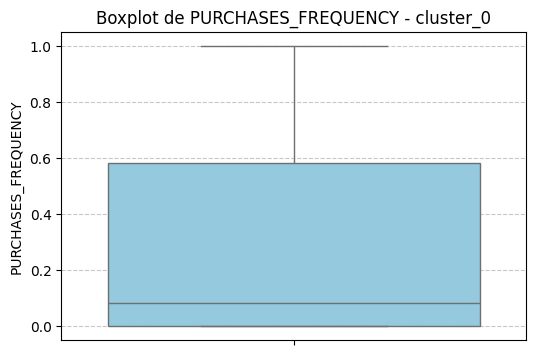

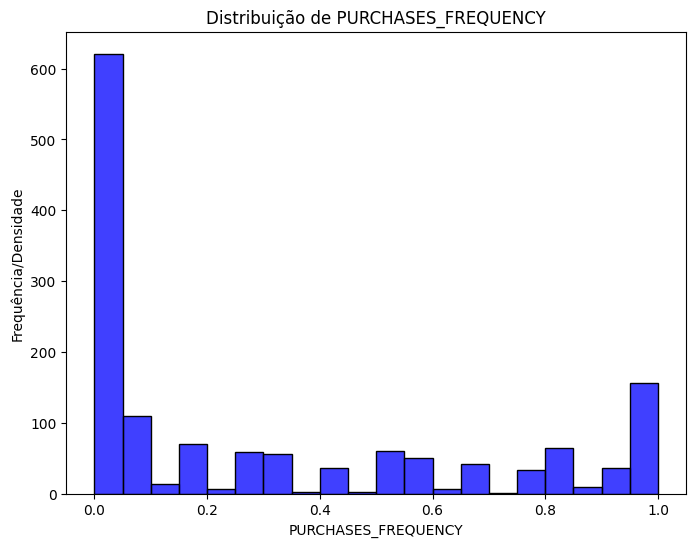


📊 Estatísticas para ONEOFF_PURCHASES_FREQUENCY:

count   1435.0
mean       0.2
std        0.3
min        0.0
25%        0.0
50%        0.0
75%        0.2
max        1.0
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64


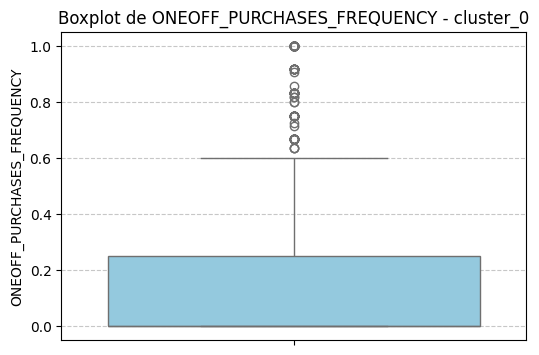

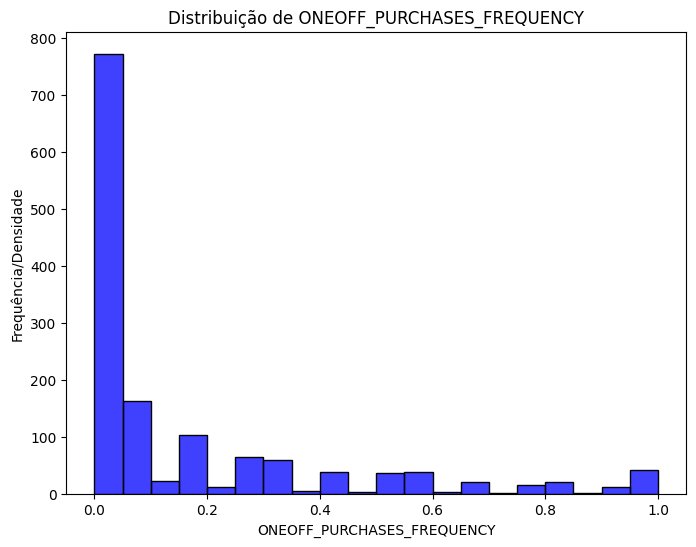


📊 Estatísticas para PURCHASES_INSTALLMENTS_FREQUENCY:

count   1435.0
mean       0.2
std        0.3
min        0.0
25%        0.0
50%        0.0
75%        0.3
max        1.0
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64


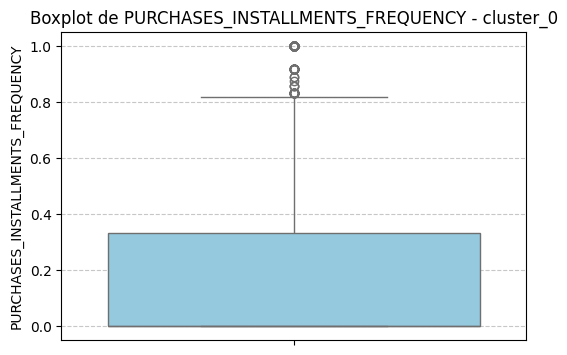

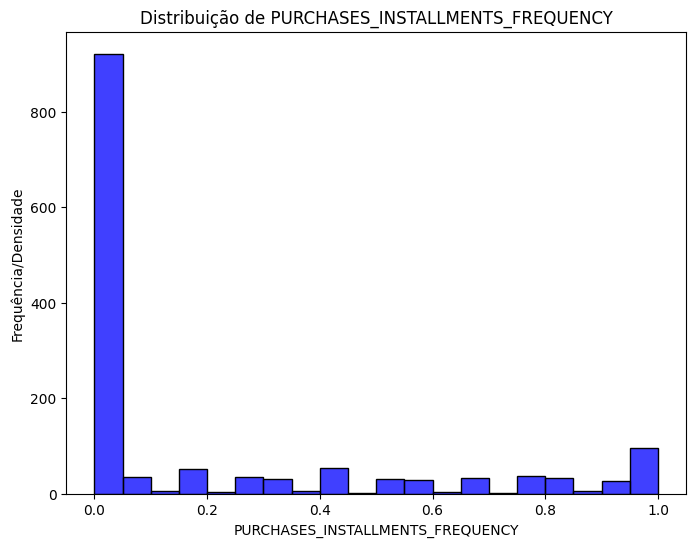


📊 Estatísticas para CASH_ADVANCE_FREQUENCY:

count   1435.0
mean       0.4
std        0.2
min        0.0
25%        0.2
50%        0.4
75%        0.6
max        1.5
Name: CASH_ADVANCE_FREQUENCY, dtype: float64


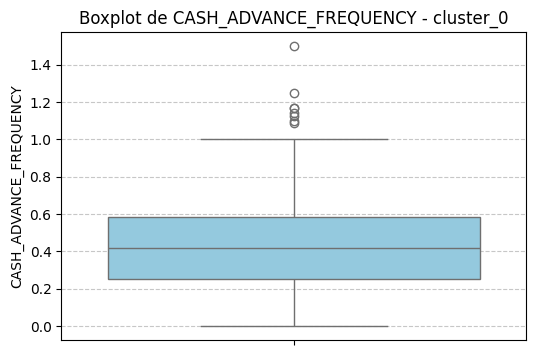

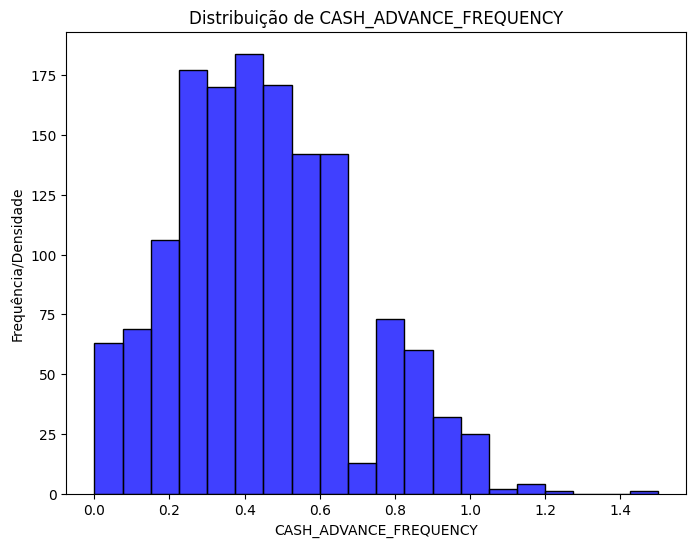


📊 Estatísticas para CASH_ADVANCE_TRX:

count   1435.0
mean      12.9
std       12.1
min        0.0
25%        6.0
50%       10.0
75%       16.5
max      123.0
Name: CASH_ADVANCE_TRX, dtype: float64


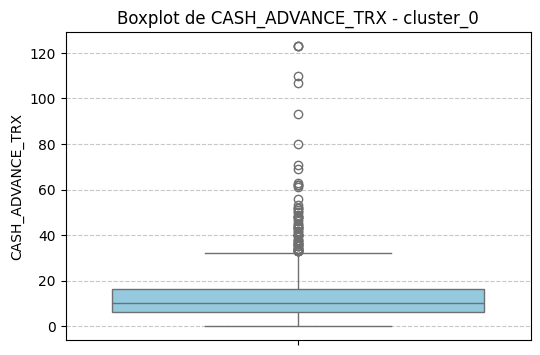

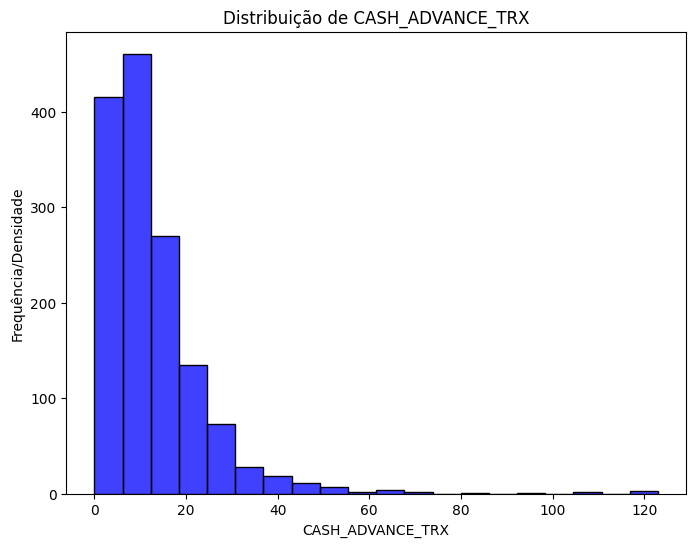


📊 Estatísticas para PURCHASES_TRX:

count   1435.0
mean      12.3
std       31.8
min        0.0
25%        0.0
50%        2.0
75%       11.5
max      358.0
Name: PURCHASES_TRX, dtype: float64


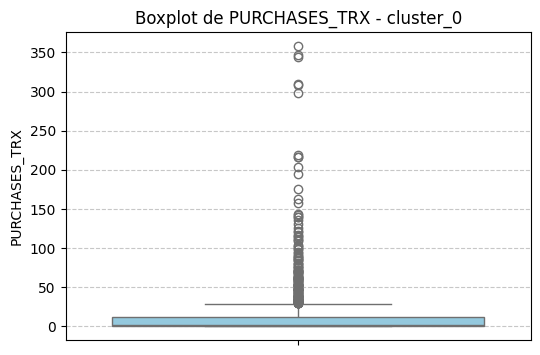

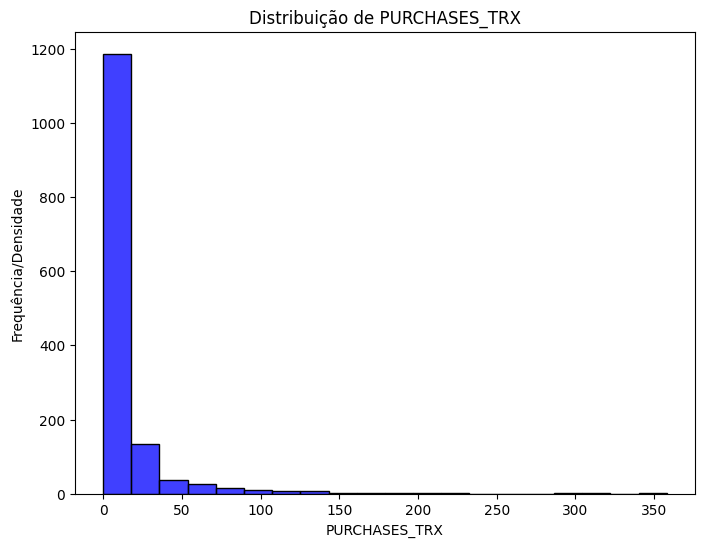


📊 Estatísticas para CREDIT_LIMIT:

count    1435.0
mean     7652.8
std      4132.8
min        50.0
25%      4650.0
50%      7000.0
75%     10000.0
max     30000.0
Name: CREDIT_LIMIT, dtype: float64


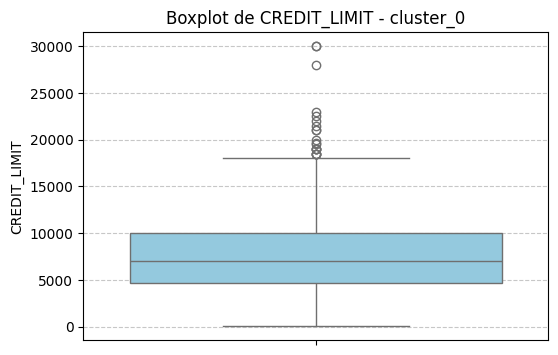

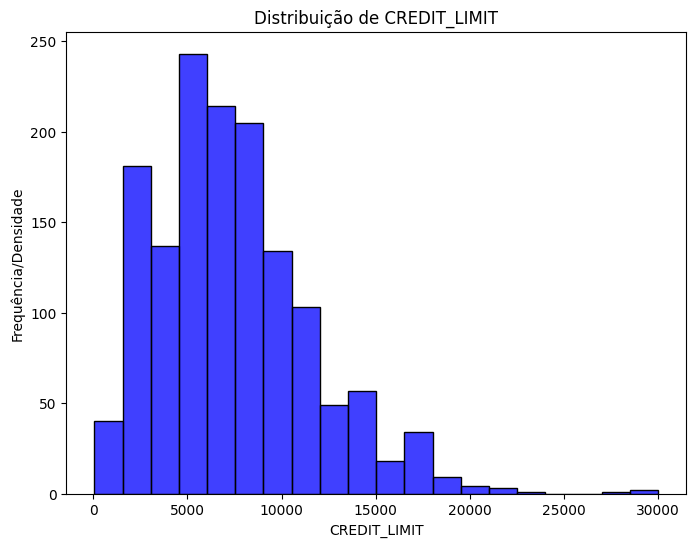


📊 Estatísticas para PAYMENTS:

count    1435.0
mean     3985.5
std      5602.7
min         0.0
25%      1131.2
50%      1946.2
75%      4431.4
max     50721.5
Name: PAYMENTS, dtype: float64


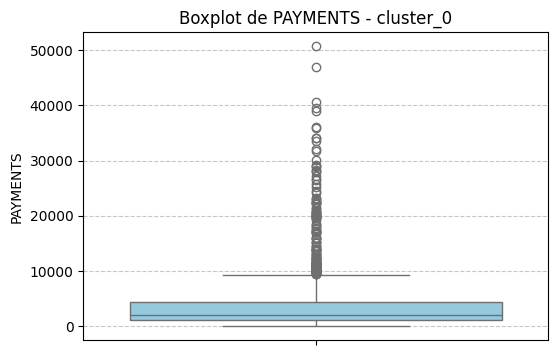

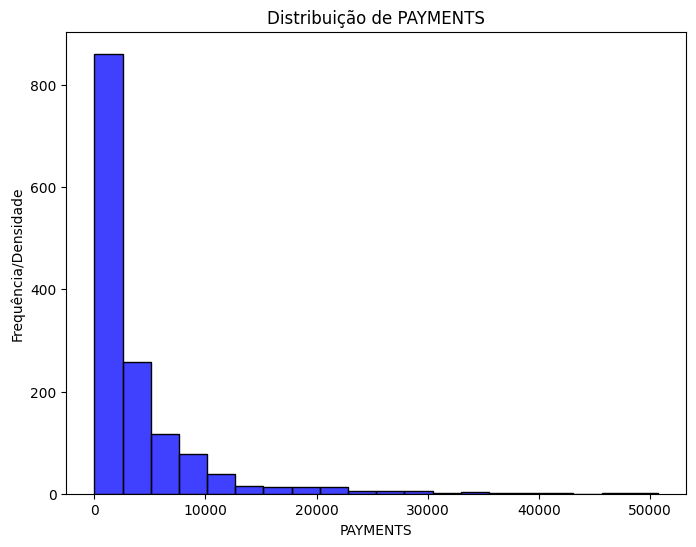


📊 Estatísticas para MINIMUM_PAYMENTS:

count    1435.0
mean     2333.5
std      4971.7
min        17.0
25%       717.9
50%      1296.7
75%      2079.8
max     76406.2
Name: MINIMUM_PAYMENTS, dtype: float64


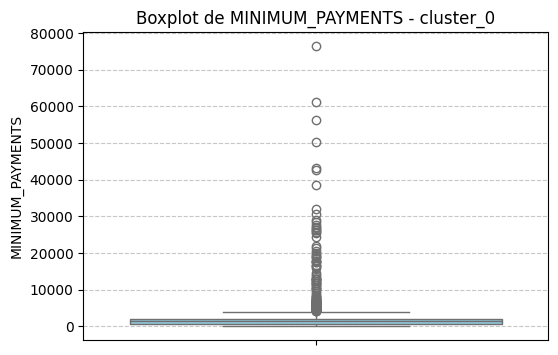

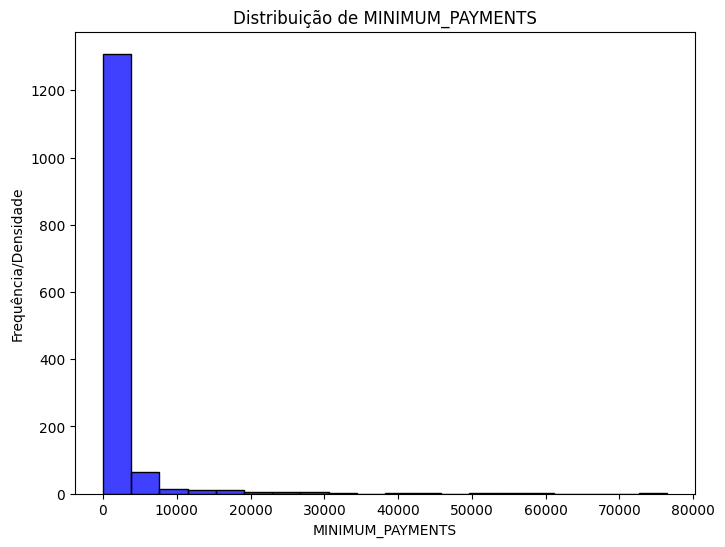


📊 Estatísticas para PRC_FULL_PAYMENT:

count   1435.0
mean       0.0
std        0.1
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
Name: PRC_FULL_PAYMENT, dtype: float64


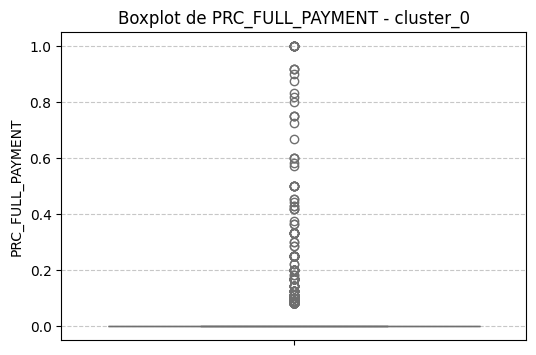

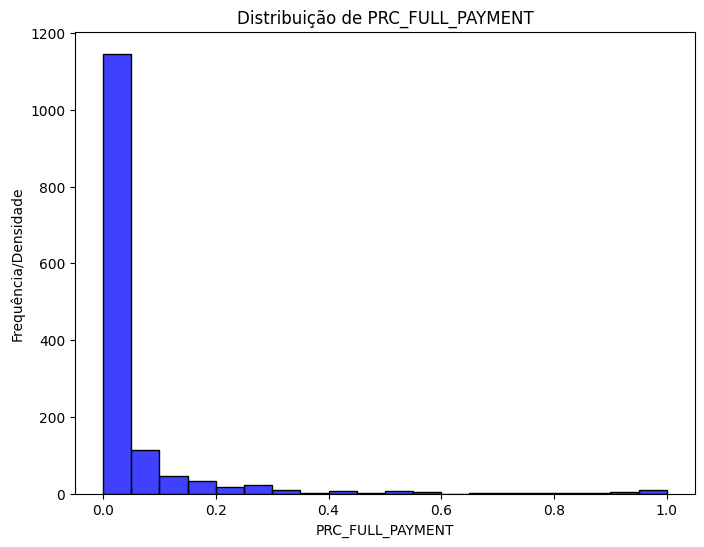


📊 Estatísticas para TENURE:

count   1435.0
mean      11.4
std        1.5
min        6.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
Name: TENURE, dtype: float64


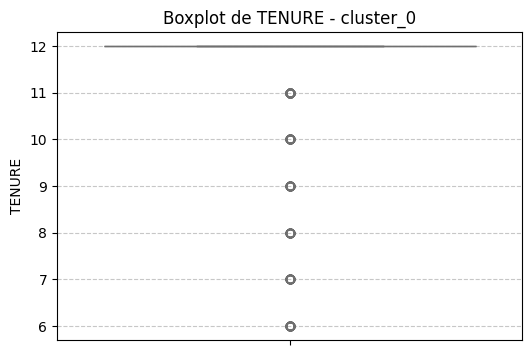

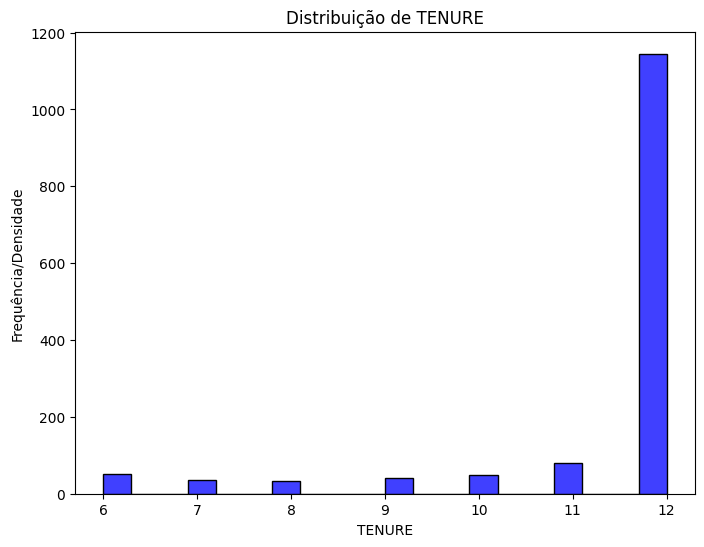

In [9]:
# Filtrar apenas os dados do Cluster 0
cluster_0 = data_with_clusters[data_with_clusters["Cluster"] == 0]

# Selecionar apenas as colunas numéricas (excluindo "Cluster" e "CUST_ID")
colunas_numericas = cluster_0.drop(columns=["Cluster", "CUST_ID"], errors="ignore").columns

# Iterar sobre cada coluna numérica
for coluna in colunas_numericas:
    print(f"\n📊 Estatísticas para {coluna}:\n")
    print(cluster_0[coluna].describe().round(1))  # Arredonda para 1 casa decimal

    # Criar o boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=cluster_0[coluna], color="skyblue")
    plt.title(f"Boxplot de {coluna} - cluster_0")
    plt.ylabel(coluna)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Criar o histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(cluster_0[coluna], kde=False, bins=20, color='blue')
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência/Densidade')
    plt.show()

### Cluster 1


📊 Estatísticas para BALANCE:

count   4215.0
mean     931.3
std     1000.6
min        0.0
25%       69.7
50%      683.4
75%     1420.1
max     5925.8
Name: BALANCE, dtype: float64


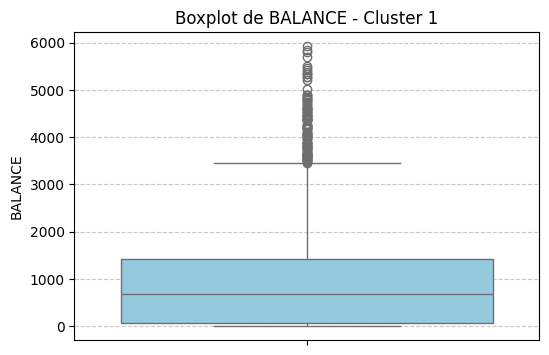

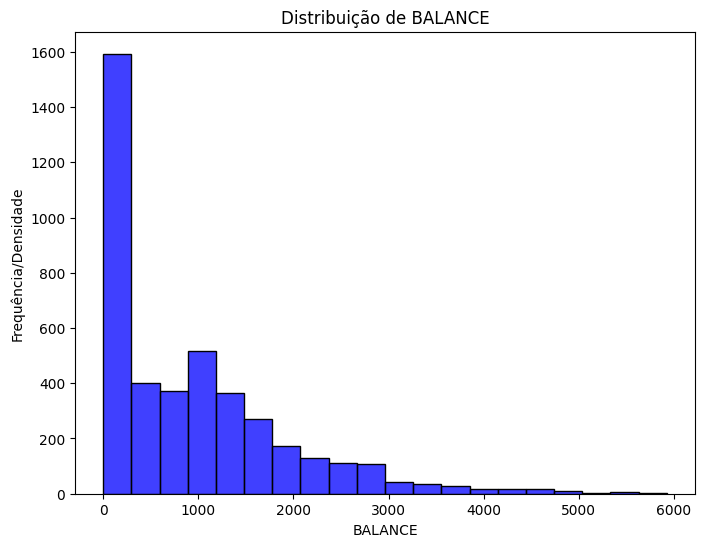


📊 Estatísticas para BALANCE_FREQUENCY:

count   4215.0
mean       0.8
std        0.3
min        0.0
25%        0.6
50%        1.0
75%        1.0
max        1.0
Name: BALANCE_FREQUENCY, dtype: float64


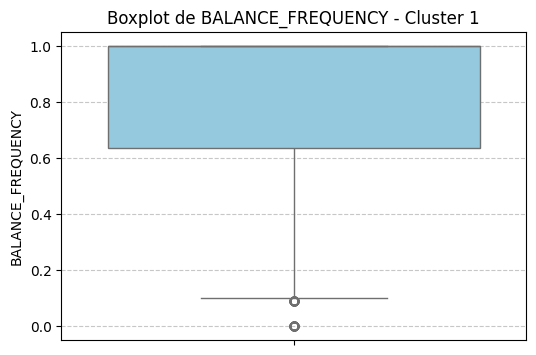

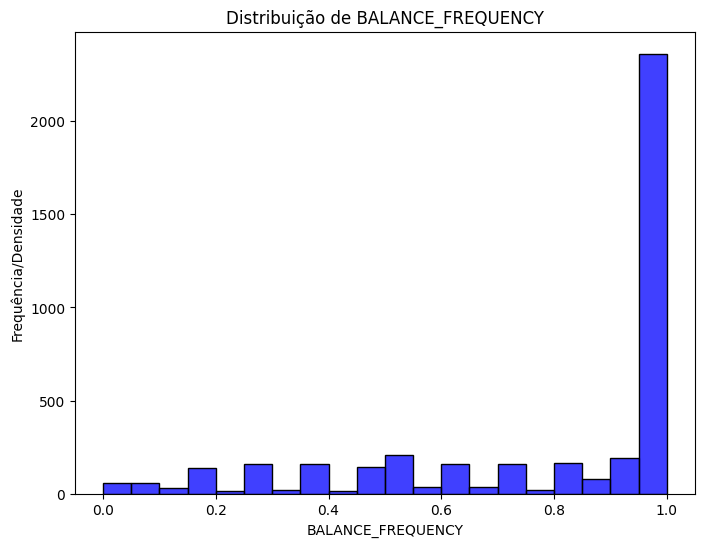


📊 Estatísticas para PURCHASES:

count   4215.0
mean     279.3
std      425.1
min        0.0
25%        0.0
50%      110.0
75%      376.0
max     3950.0
Name: PURCHASES, dtype: float64


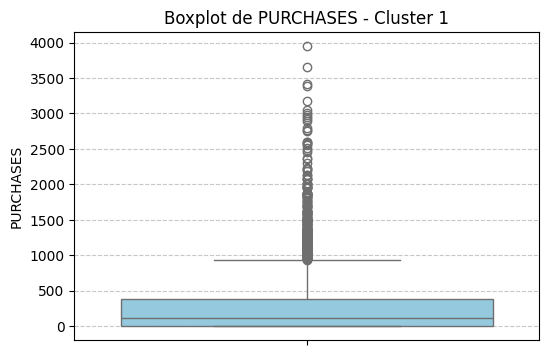

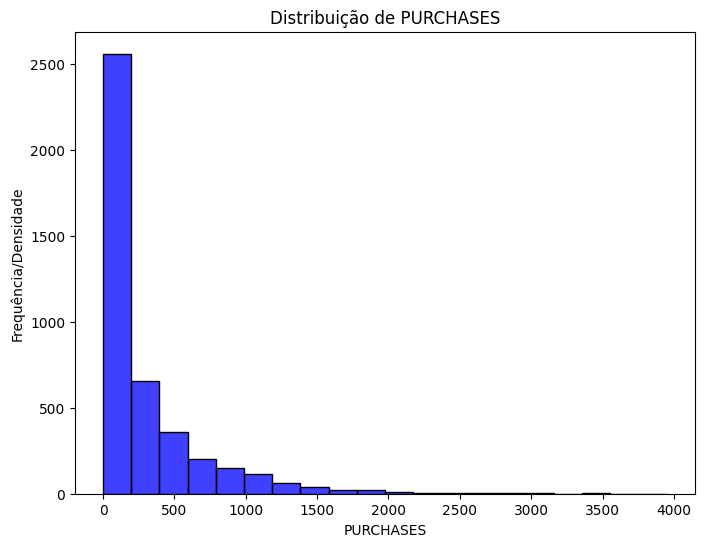


📊 Estatísticas para ONEOFF_PURCHASES:

count   4215.0
mean     193.5
std      397.0
min        0.0
25%        0.0
50%        0.0
75%      204.1
max     3950.0
Name: ONEOFF_PURCHASES, dtype: float64


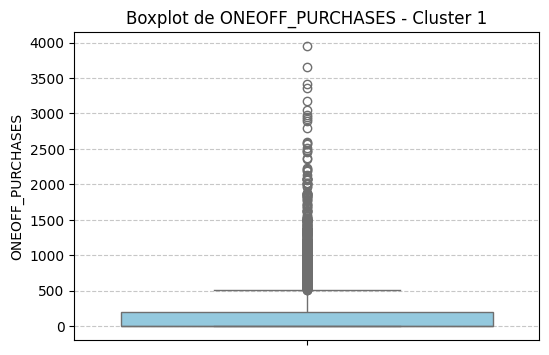

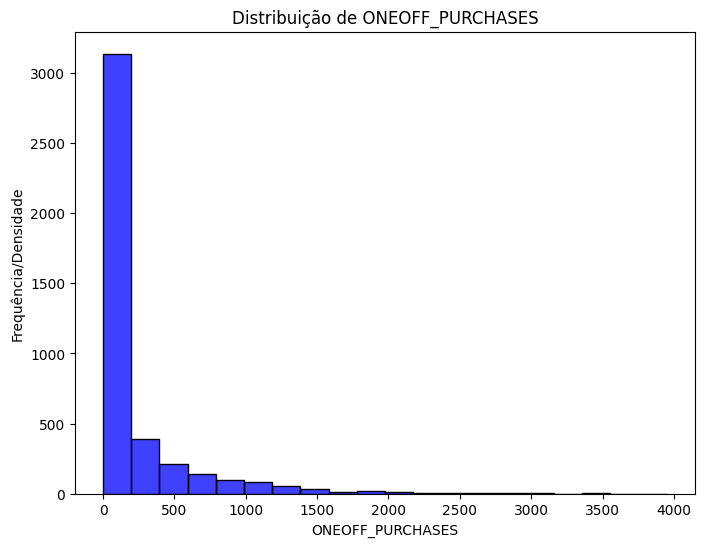


📊 Estatísticas para INSTALLMENTS_PURCHASES:

count   4215.0
mean      86.1
std      181.2
min        0.0
25%        0.0
50%        0.0
75%      100.0
max     3000.0
Name: INSTALLMENTS_PURCHASES, dtype: float64


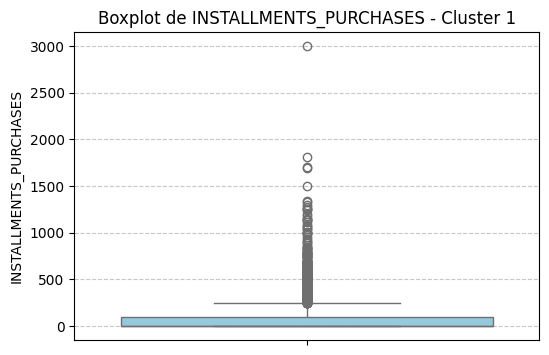

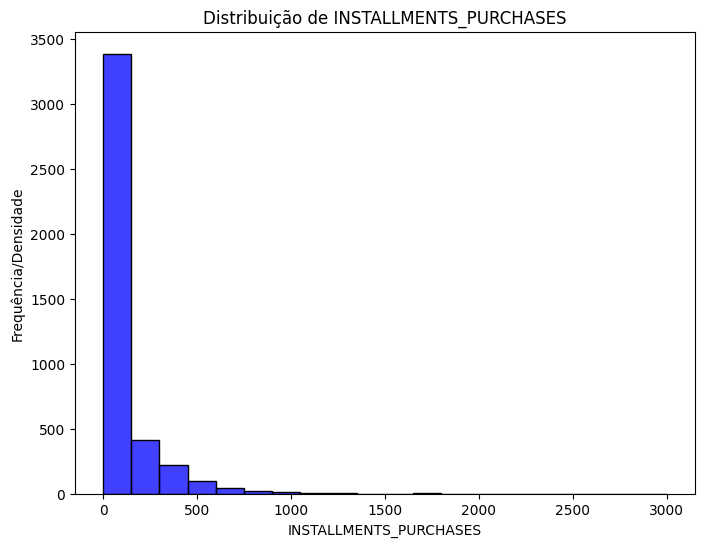


📊 Estatísticas para CASH_ADVANCE:

count   4215.0
mean     530.7
std      848.3
min        0.0
25%        0.0
50%       74.0
75%      839.7
max     6523.8
Name: CASH_ADVANCE, dtype: float64


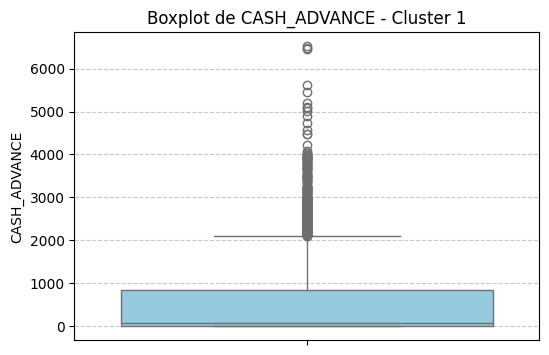

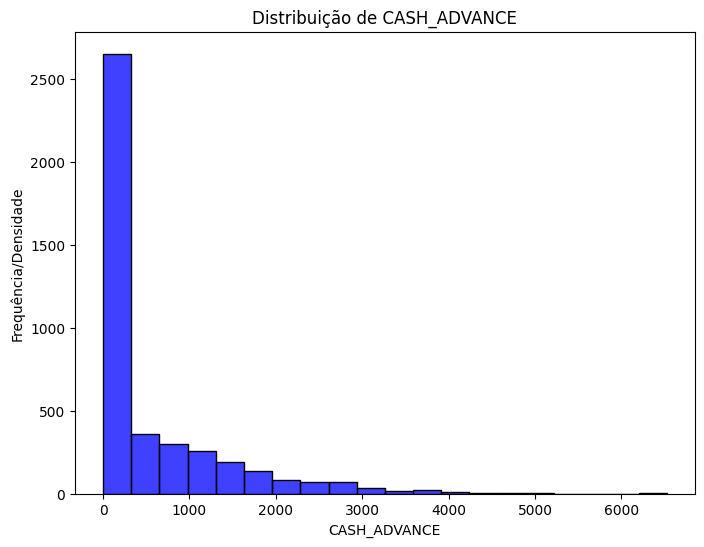


📊 Estatísticas para PURCHASES_FREQUENCY:

count   4215.0
mean       0.2
std        0.2
min        0.0
25%        0.0
50%        0.1
75%        0.4
max        1.0
Name: PURCHASES_FREQUENCY, dtype: float64


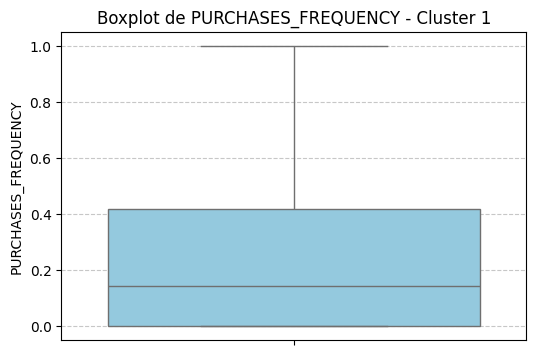

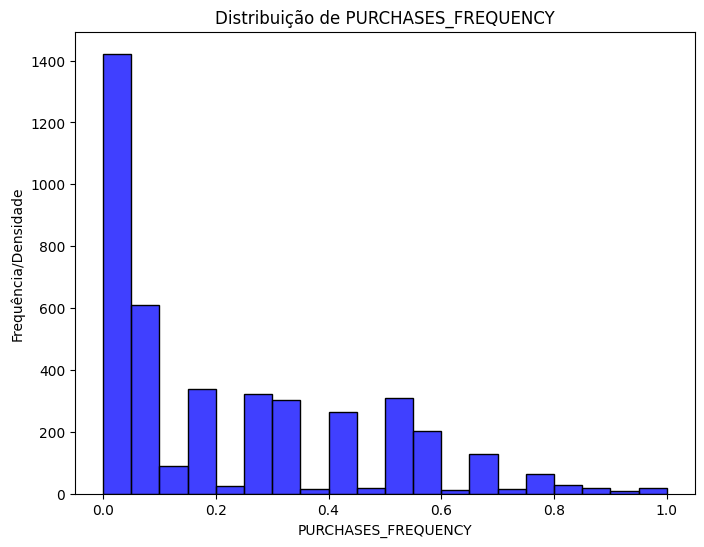


📊 Estatísticas para ONEOFF_PURCHASES_FREQUENCY:

count   4215.0
mean       0.1
std        0.1
min        0.0
25%        0.0
50%        0.0
75%        0.1
max        0.8
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64


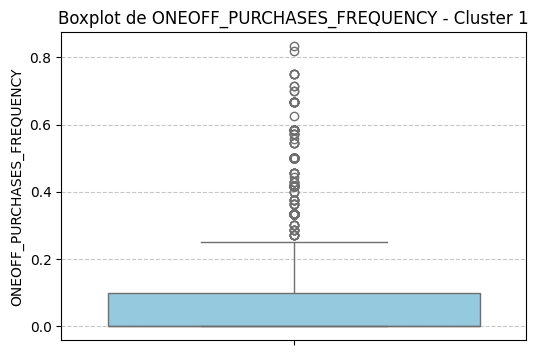

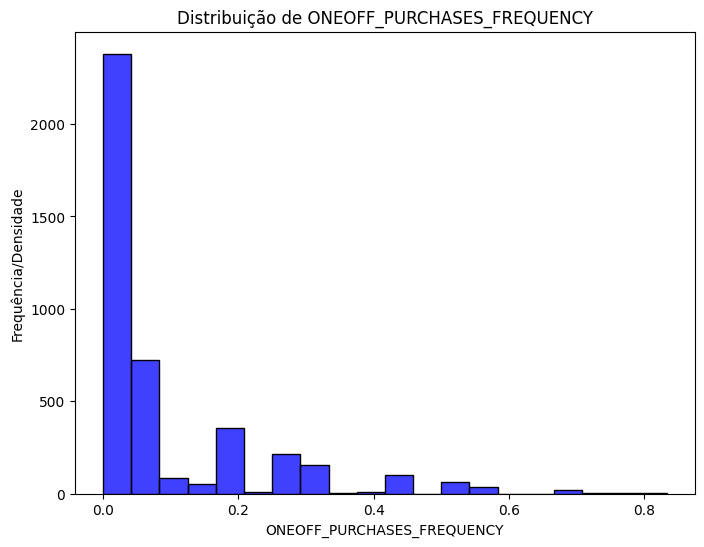


📊 Estatísticas para PURCHASES_INSTALLMENTS_FREQUENCY:

count   4215.0
mean       0.1
std        0.2
min        0.0
25%        0.0
50%        0.0
75%        0.2
max        1.0
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64


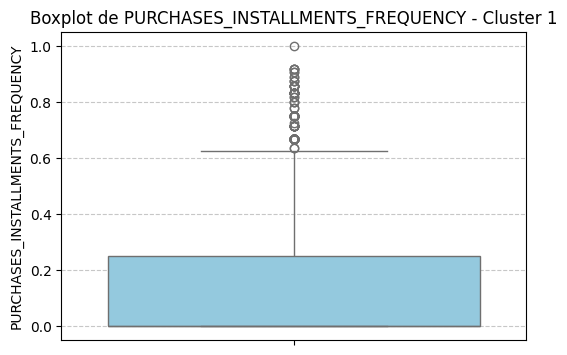

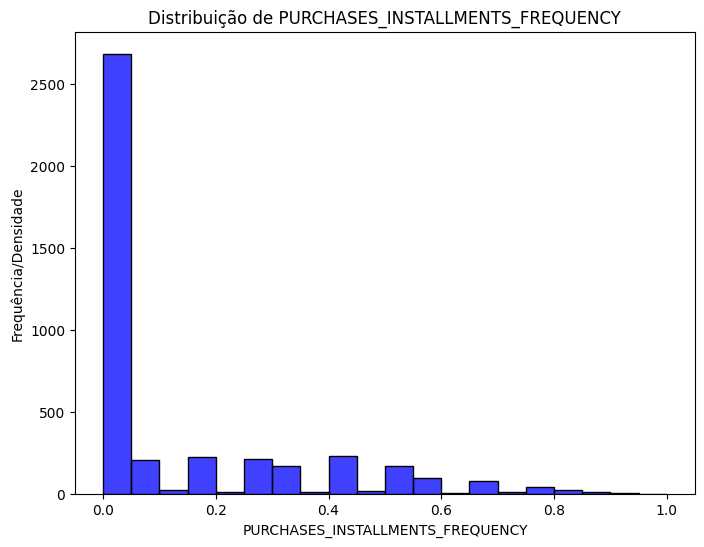


📊 Estatísticas para CASH_ADVANCE_FREQUENCY:

count   4215.0
mean       0.1
std        0.1
min        0.0
25%        0.0
50%        0.1
75%        0.2
max        0.7
Name: CASH_ADVANCE_FREQUENCY, dtype: float64


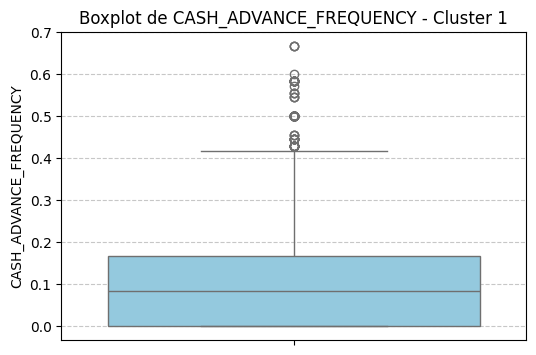

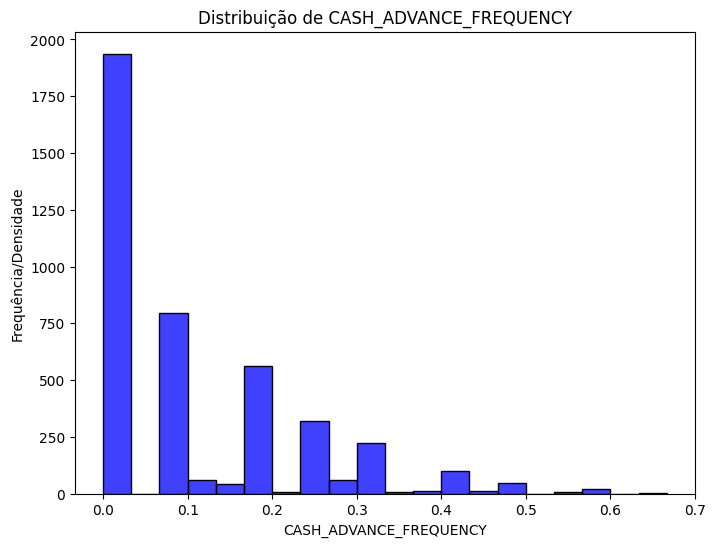


📊 Estatísticas para CASH_ADVANCE_TRX:

count   4215.0
mean       2.0
std        2.8
min        0.0
25%        0.0
50%        1.0
75%        3.0
max       23.0
Name: CASH_ADVANCE_TRX, dtype: float64


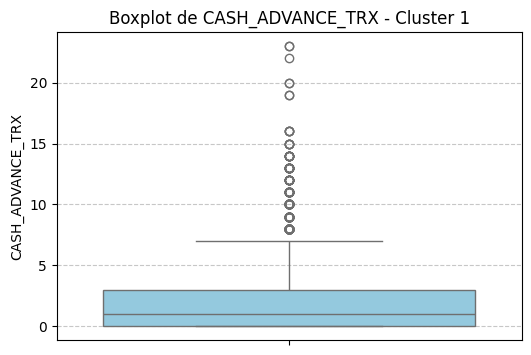

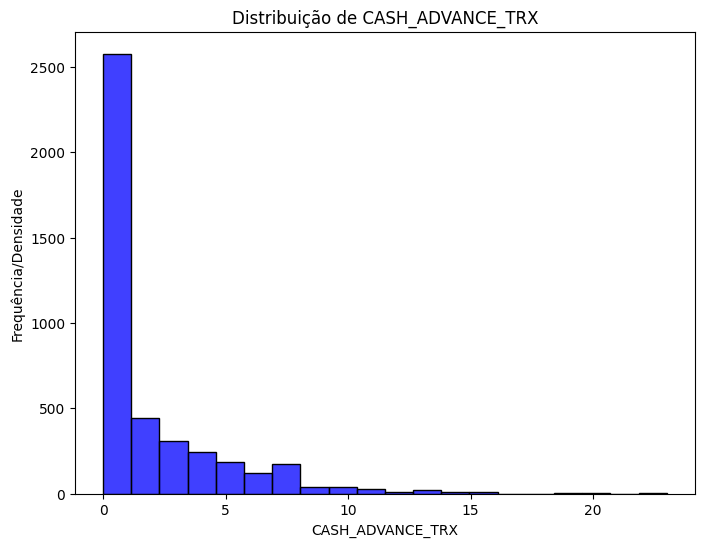


📊 Estatísticas para PURCHASES_TRX:

count   4215.0
mean       3.6
std        4.4
min        0.0
25%        0.0
50%        2.0
75%        6.0
max       43.0
Name: PURCHASES_TRX, dtype: float64


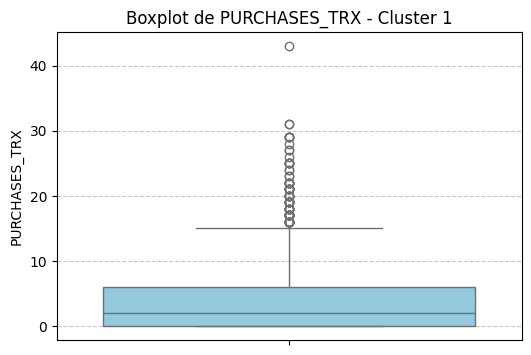

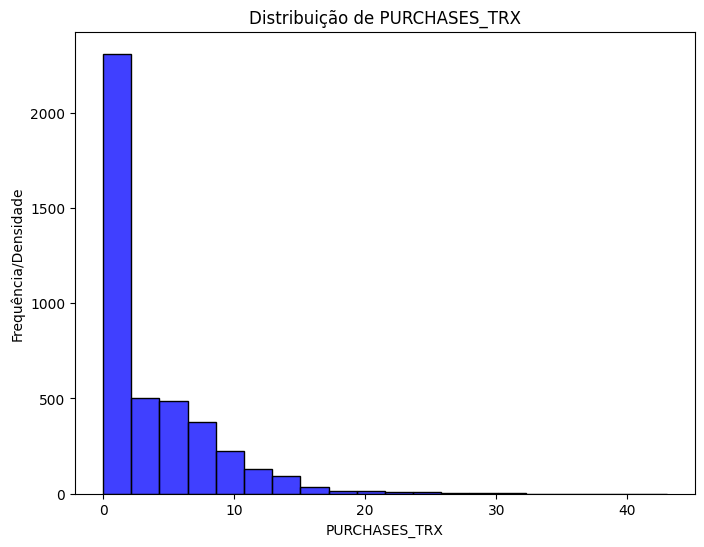


📊 Estatísticas para CREDIT_LIMIT:

count    4215.0
mean     3139.1
std      2502.1
min       150.0
25%      1500.0
50%      2500.0
75%      4000.0
max     23000.0
Name: CREDIT_LIMIT, dtype: float64


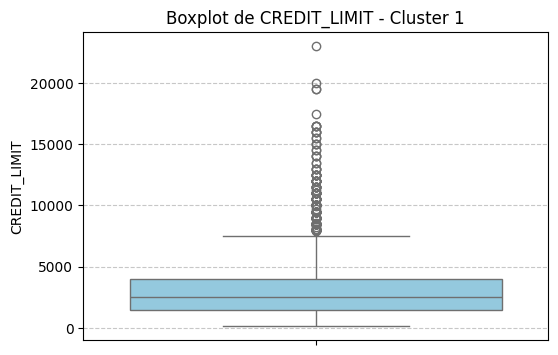

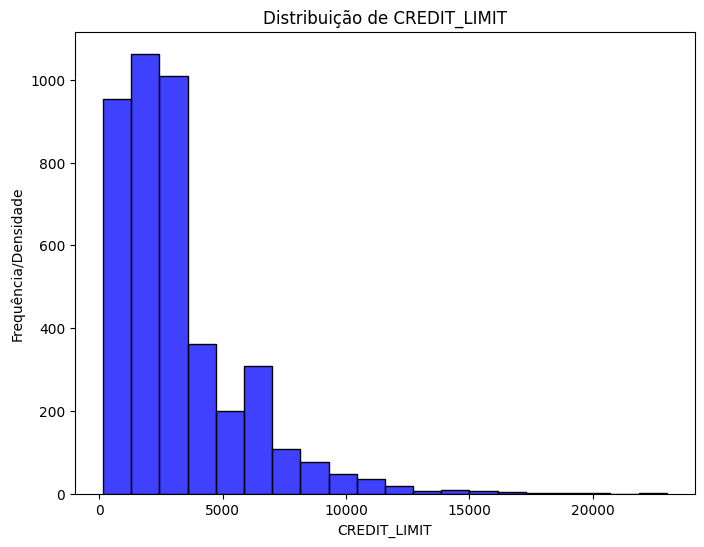


📊 Estatísticas para PAYMENTS:

count    4215.0
mean      881.5
std      1193.1
min         0.0
25%       262.9
50%       524.1
75%      1002.0
max     16842.4
Name: PAYMENTS, dtype: float64


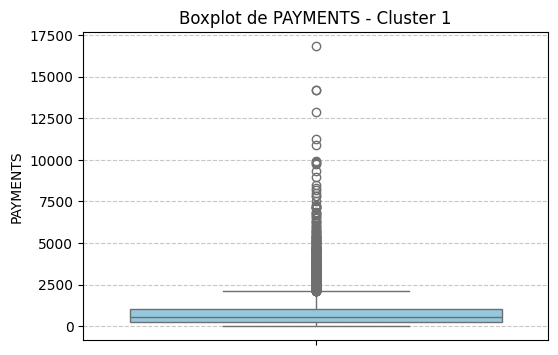

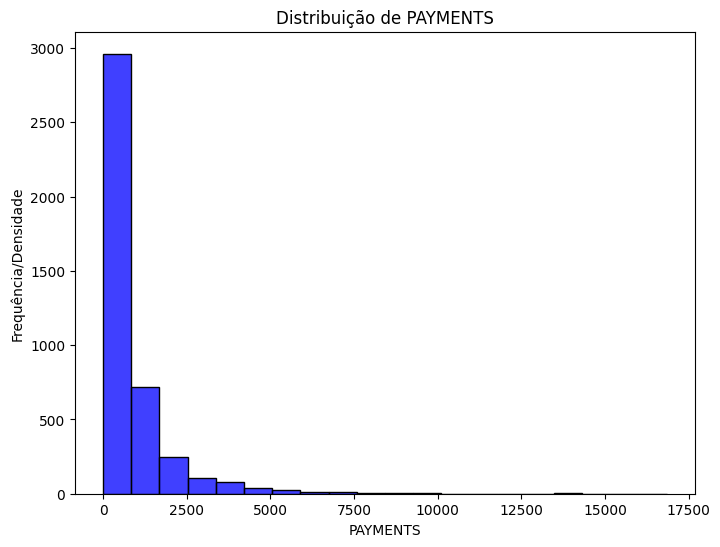


📊 Estatísticas para MINIMUM_PAYMENTS:

count    4215.0
mean      493.3
std       902.7
min         0.0
25%       153.7
50%       292.8
75%       519.5
max     13453.3
Name: MINIMUM_PAYMENTS, dtype: float64


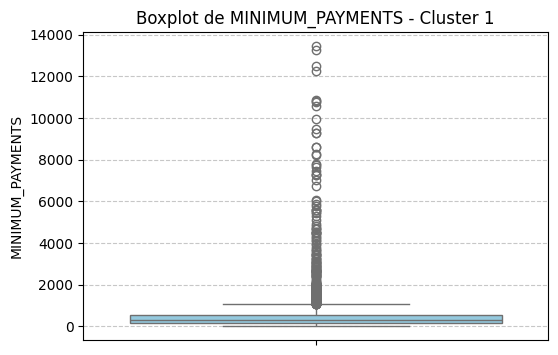

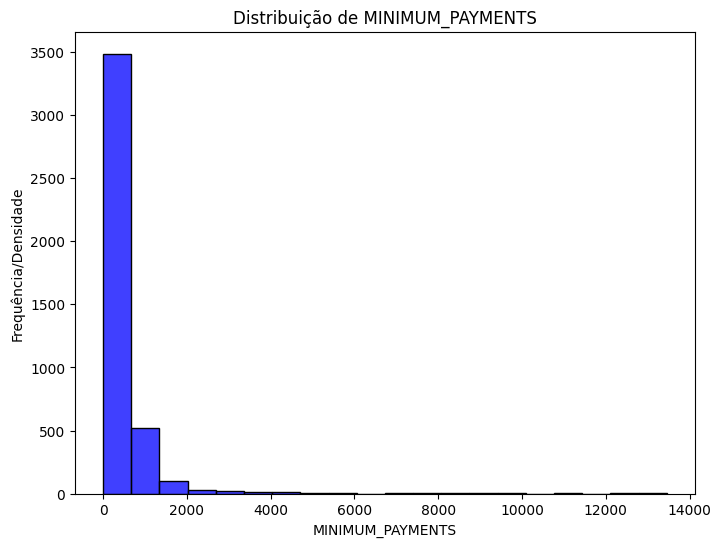


📊 Estatísticas para PRC_FULL_PAYMENT:

count   4215.0
mean       0.1
std        0.2
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
Name: PRC_FULL_PAYMENT, dtype: float64


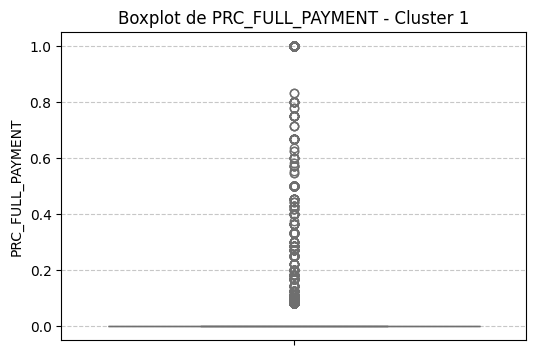

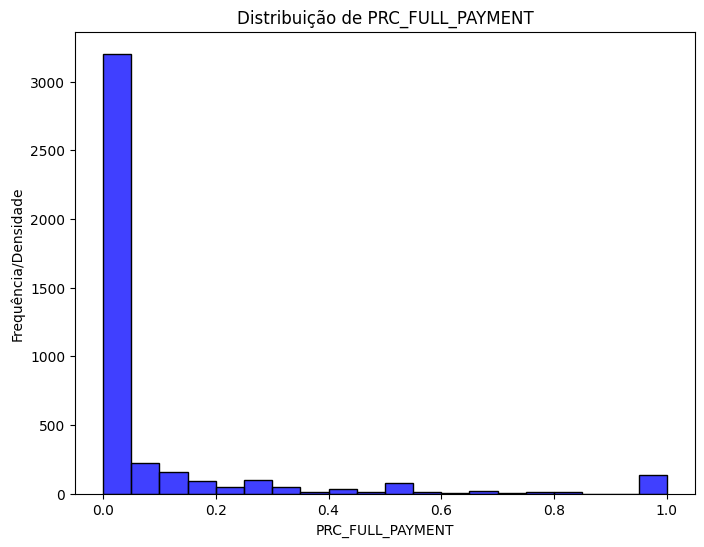


📊 Estatísticas para TENURE:

count   4215.0
mean      11.4
std        1.4
min        6.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
Name: TENURE, dtype: float64


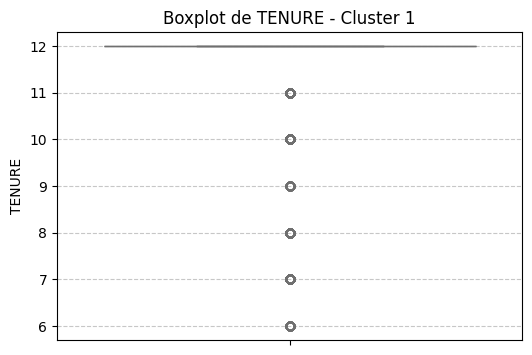

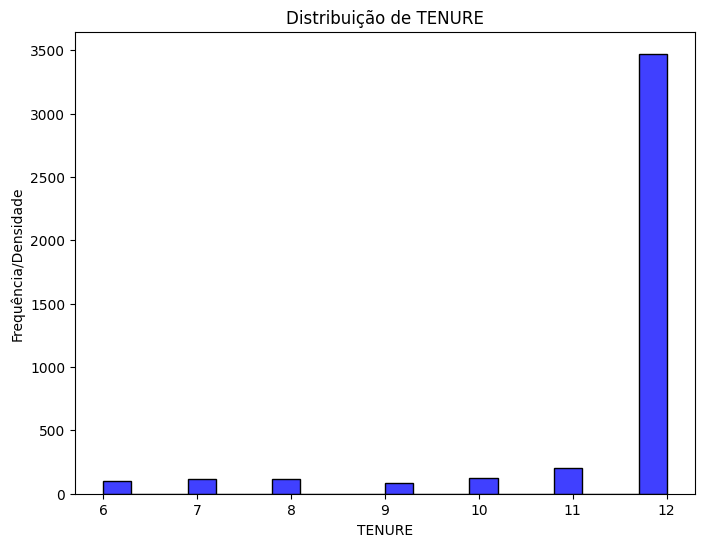

In [10]:
# Filtrar apenas os dados do Cluster 0
cluster_1 = data_with_clusters[data_with_clusters["Cluster"] == 1]

# Selecionar apenas as colunas numéricas (excluindo "Cluster" e "CUST_ID")
colunas_numericas = cluster_1.drop(columns=["Cluster", "CUST_ID"], errors="ignore").columns

# Iterar sobre cada coluna numérica
for coluna in colunas_numericas:
    print(f"\n📊 Estatísticas para {coluna}:\n")
    print(cluster_1[coluna].describe().round(1))  # Arredonda para 1 casa decimal

    # Criar o boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=cluster_1[coluna], color="skyblue")
    plt.title(f"Boxplot de {coluna} - Cluster 1")
    plt.ylabel(coluna)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Criar o histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(cluster_1[coluna], kde=False, bins=20, color='blue')
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência/Densidade')
    plt.show()

## Cluster 2


📊 Estatísticas para BALANCE:

count    3300.0
mean     1084.3
std      1538.5
min         0.0
25%        96.1
50%       425.3
75%      1459.7
max     11279.0
Name: BALANCE, dtype: float64


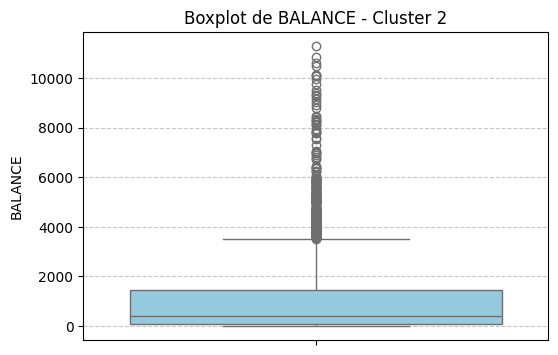

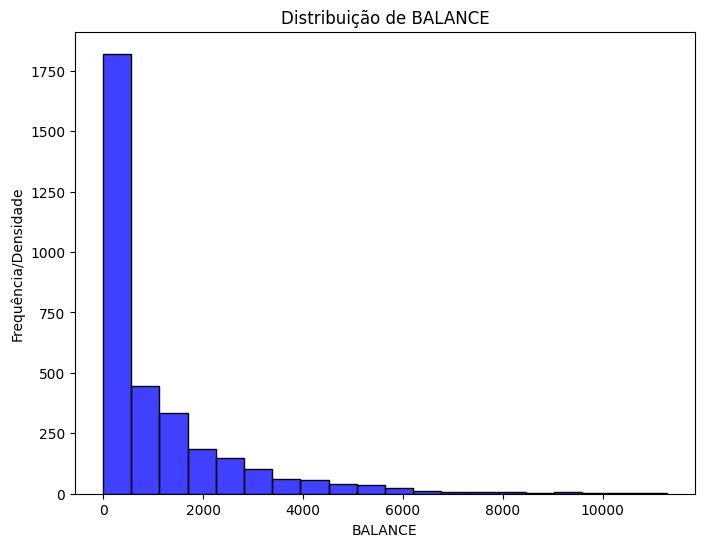


📊 Estatísticas para BALANCE_FREQUENCY:

count   3300.0
mean       0.9
std        0.1
min        0.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: BALANCE_FREQUENCY, dtype: float64


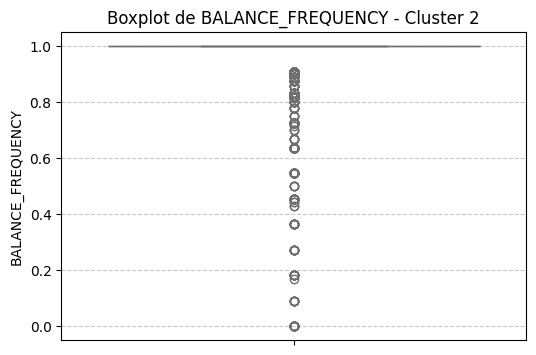

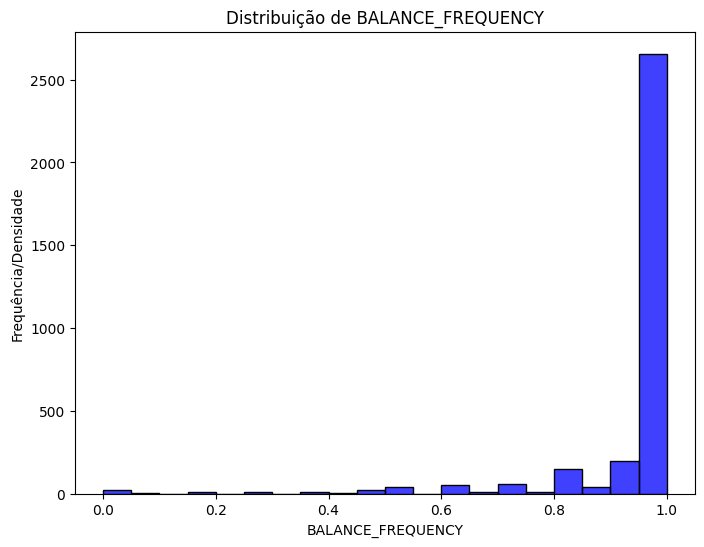


📊 Estatísticas para PURCHASES:

count    3300.0
mean     1848.5
std      1979.6
min         8.4
25%       548.7
50%      1206.1
75%      2381.5
max     15704.0
Name: PURCHASES, dtype: float64


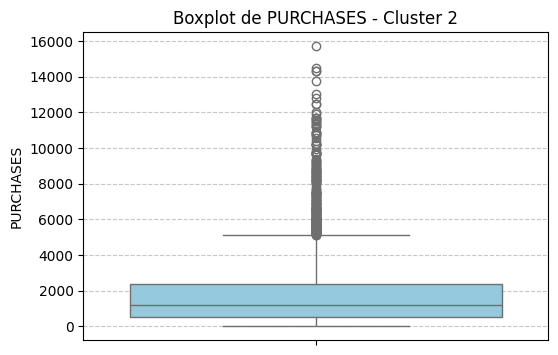

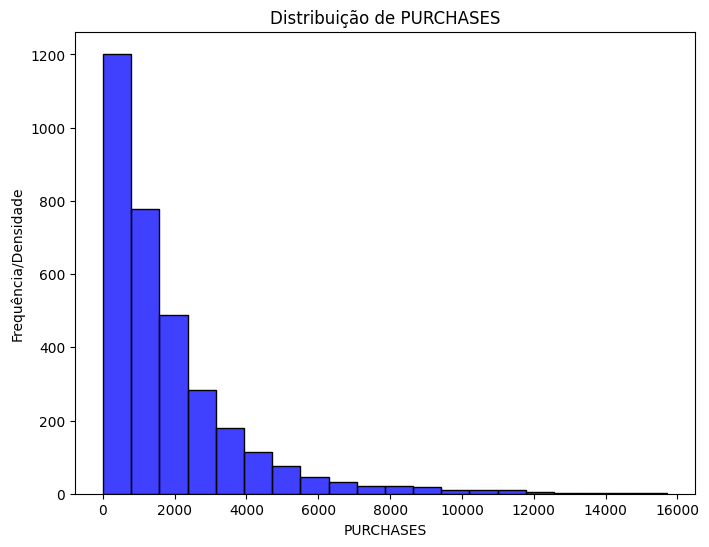


📊 Estatísticas para ONEOFF_PURCHASES:

count    3300.0
mean     1011.1
std      1595.1
min         0.0
25%         0.0
50%       391.7
75%      1374.3
max     12618.9
Name: ONEOFF_PURCHASES, dtype: float64


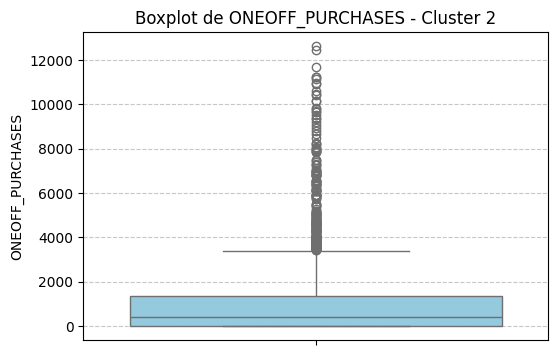

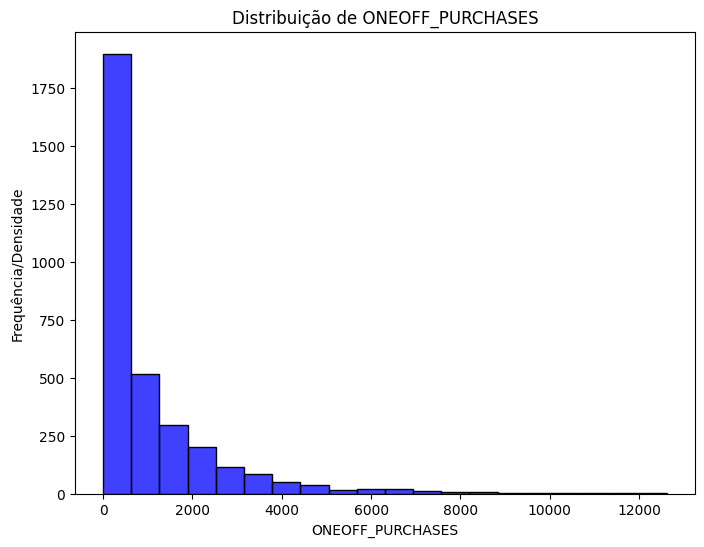


📊 Estatísticas para INSTALLMENTS_PURCHASES:

count   3300.0
mean     837.8
std      963.3
min        0.0
25%      250.4
50%      544.9
75%     1097.7
max     9268.3
Name: INSTALLMENTS_PURCHASES, dtype: float64


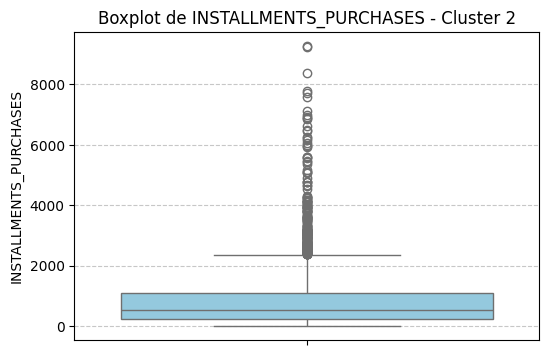

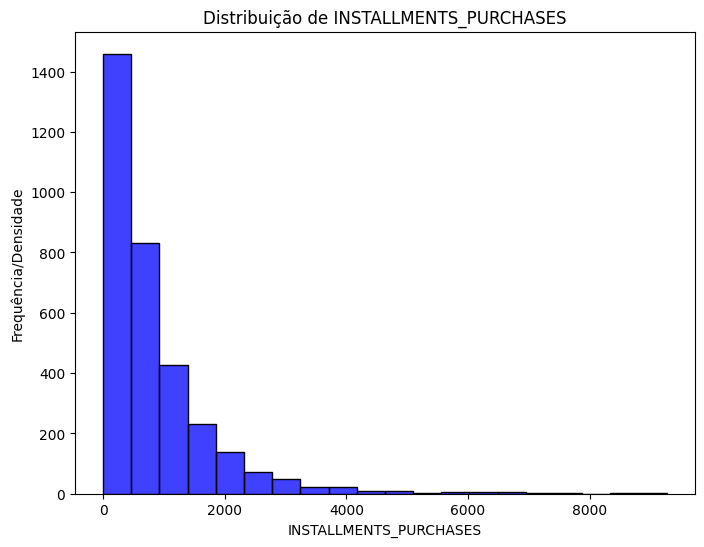


📊 Estatísticas para CASH_ADVANCE:

count   3300.0
mean     200.4
std      607.2
min        0.0
25%        0.0
50%        0.0
75%        0.0
max     7894.6
Name: CASH_ADVANCE, dtype: float64


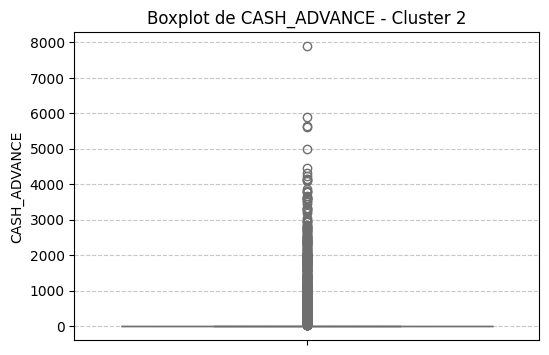

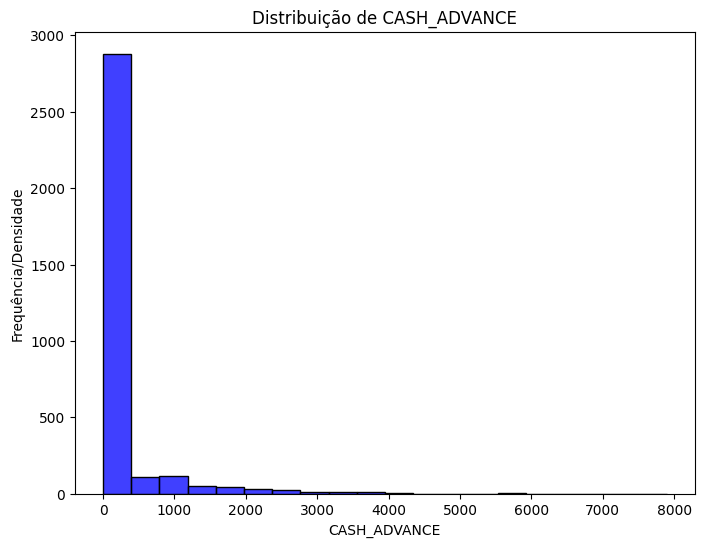


📊 Estatísticas para PURCHASES_FREQUENCY:

count   3300.0
mean       0.9
std        0.1
min        0.2
25%        0.8
50%        1.0
75%        1.0
max        1.0
Name: PURCHASES_FREQUENCY, dtype: float64


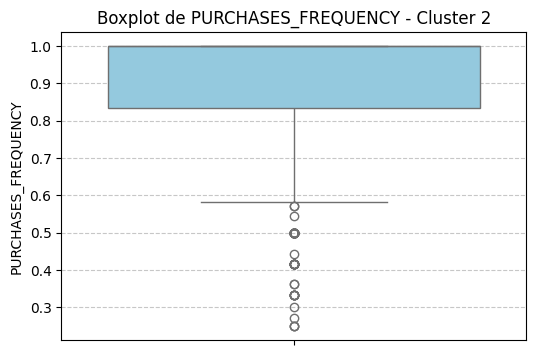

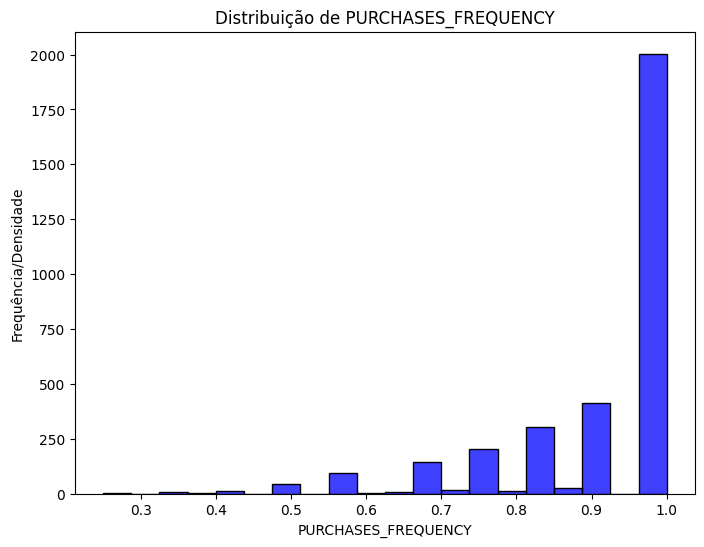


📊 Estatísticas para ONEOFF_PURCHASES_FREQUENCY:

count   3300.0
mean       0.4
std        0.4
min        0.0
25%        0.0
50%        0.2
75%        0.8
max        1.0
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64


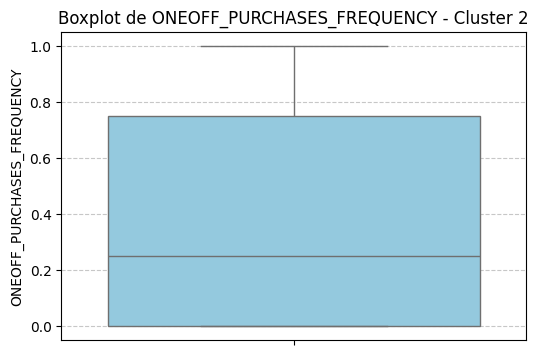

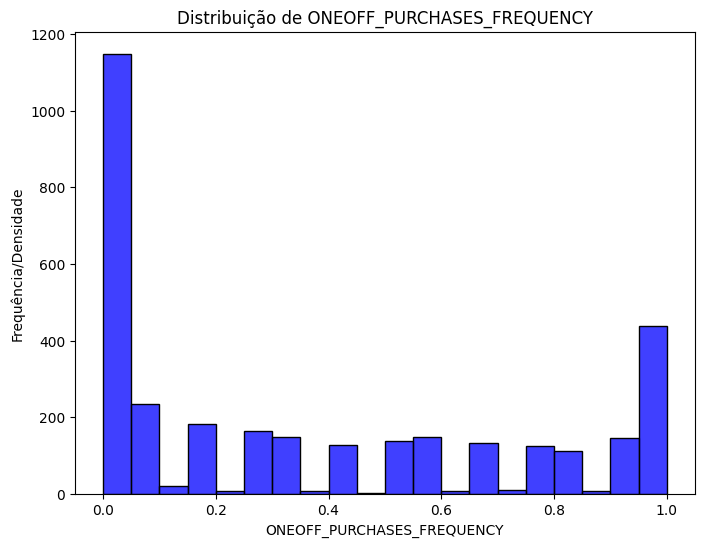


📊 Estatísticas para PURCHASES_INSTALLMENTS_FREQUENCY:

count   3300.0
mean       0.7
std        0.3
min        0.0
25%        0.6
50%        0.9
75%        1.0
max        1.0
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64


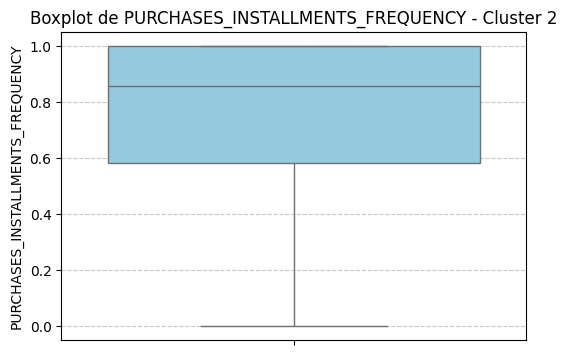

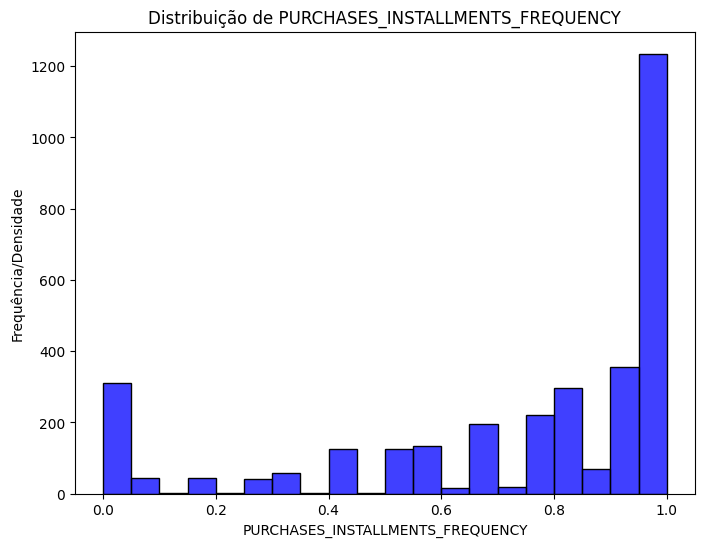


📊 Estatísticas para CASH_ADVANCE_FREQUENCY:

count   3300.0
mean       0.0
std        0.1
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.8
Name: CASH_ADVANCE_FREQUENCY, dtype: float64


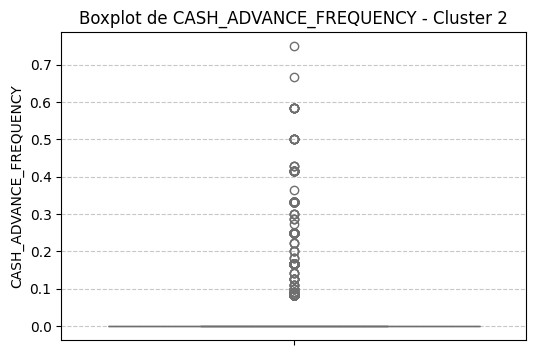

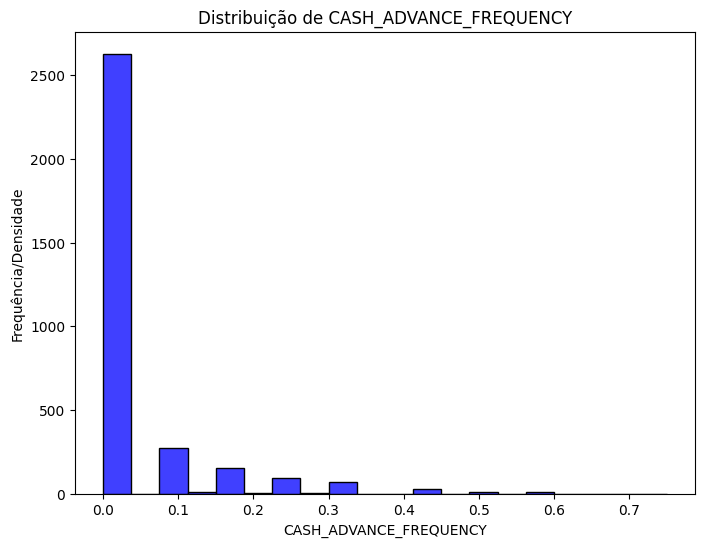


📊 Estatísticas para CASH_ADVANCE_TRX:

count   3300.0
mean       0.7
std        1.9
min        0.0
25%        0.0
50%        0.0
75%        0.0
max       23.0
Name: CASH_ADVANCE_TRX, dtype: float64


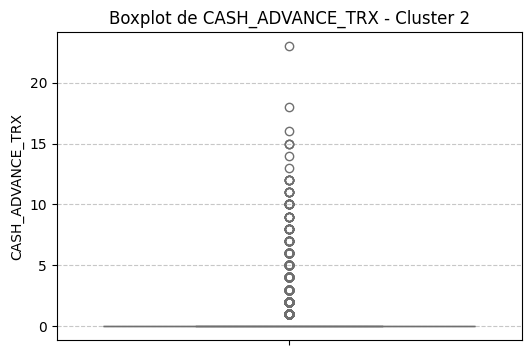

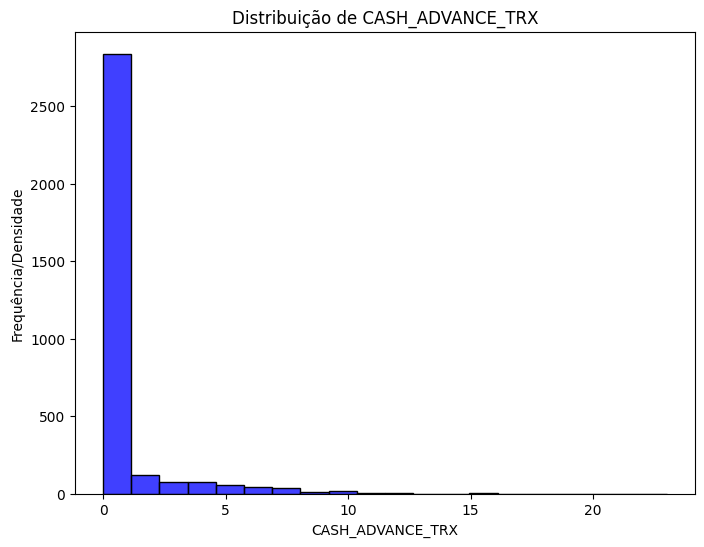


📊 Estatísticas para PURCHASES_TRX:

count   3300.0
mean      29.9
std       28.6
min        0.0
25%       12.0
50%       21.0
75%       36.0
max      274.0
Name: PURCHASES_TRX, dtype: float64


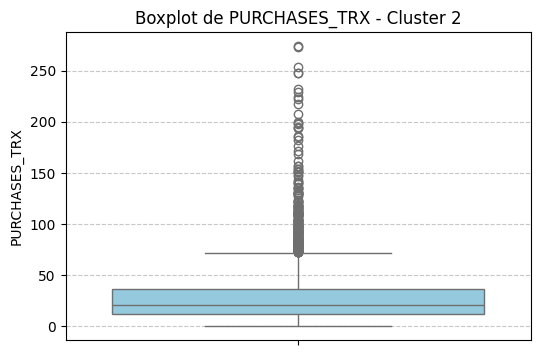

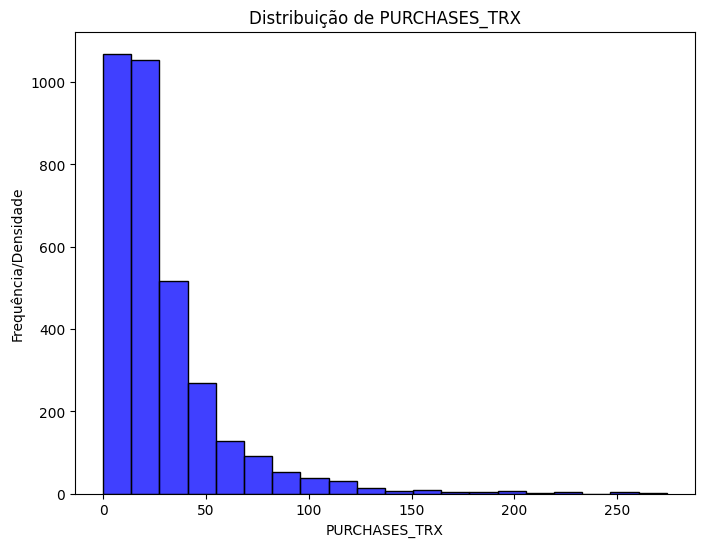


📊 Estatísticas para CREDIT_LIMIT:

count    3300.0
mean     4851.7
std      3698.6
min       300.0
25%      1800.0
50%      4000.0
75%      7000.0
max     25000.0
Name: CREDIT_LIMIT, dtype: float64


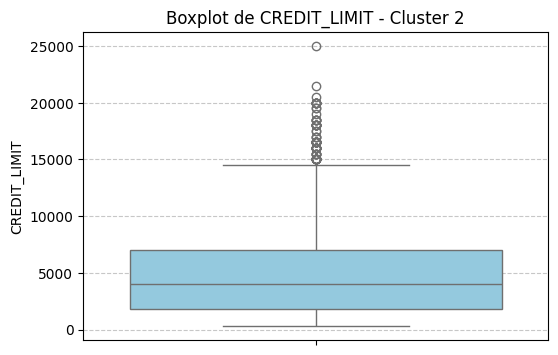

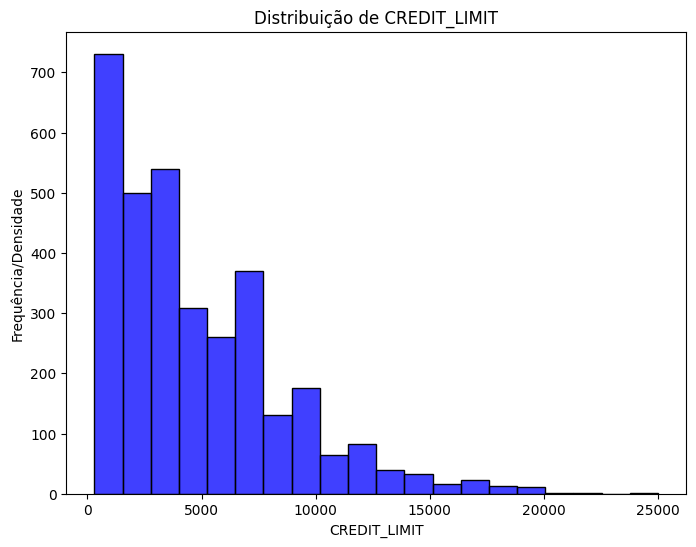


📊 Estatísticas para PAYMENTS:

count    3300.0
mean     1841.6
std      2031.6
min         0.0
25%       553.4
50%      1198.7
75%      2340.5
max     16826.4
Name: PAYMENTS, dtype: float64


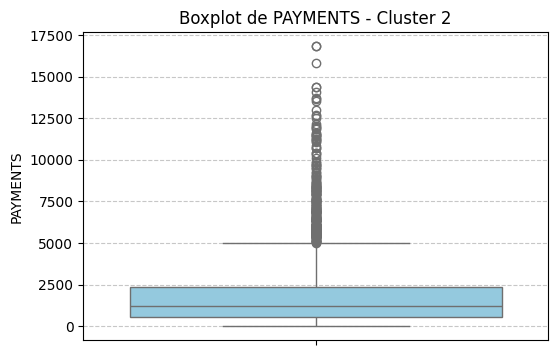

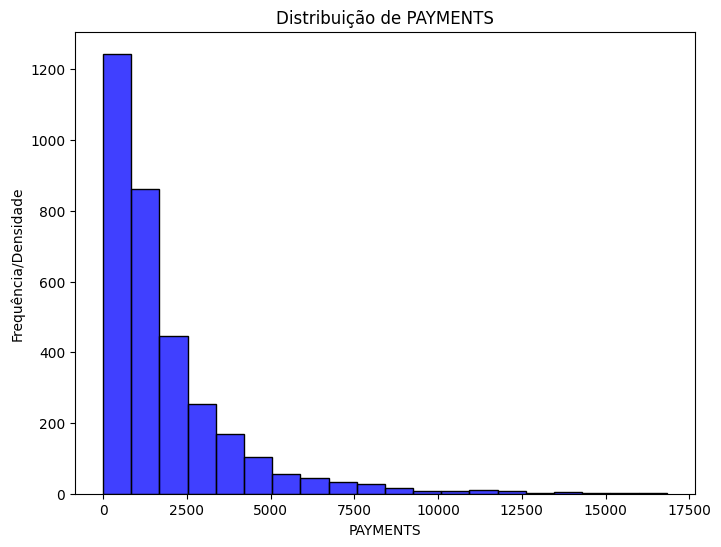


📊 Estatísticas para MINIMUM_PAYMENTS:

count    3300.0
mean      645.5
std      1347.7
min         0.3
25%       165.0
50%       204.8
75%       603.0
max     20316.1
Name: MINIMUM_PAYMENTS, dtype: float64


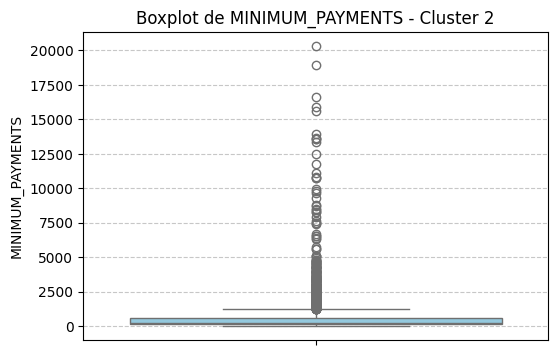

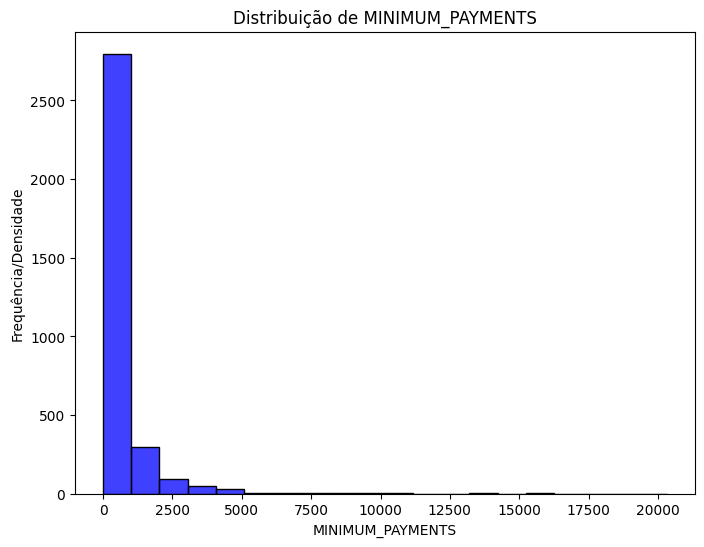


📊 Estatísticas para PRC_FULL_PAYMENT:

count   3300.0
mean       0.3
std        0.4
min        0.0
25%        0.0
50%        0.1
75%        0.6
max        1.0
Name: PRC_FULL_PAYMENT, dtype: float64


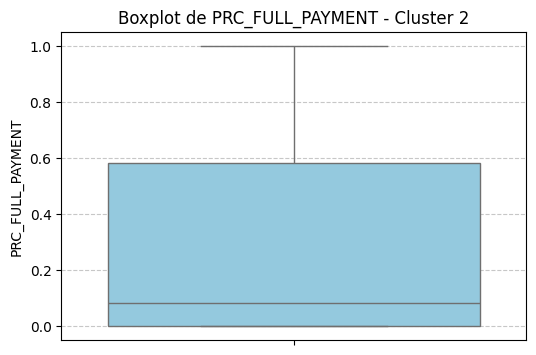

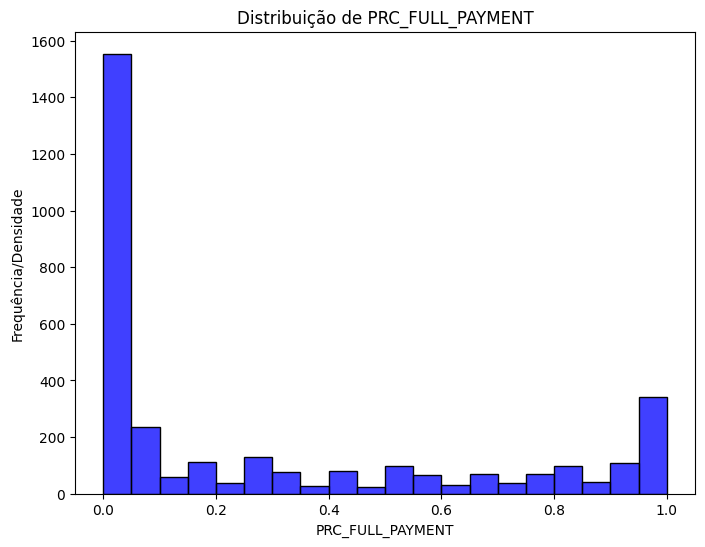


📊 Estatísticas para TENURE:

count   3300.0
mean      11.7
std        1.1
min        6.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
Name: TENURE, dtype: float64


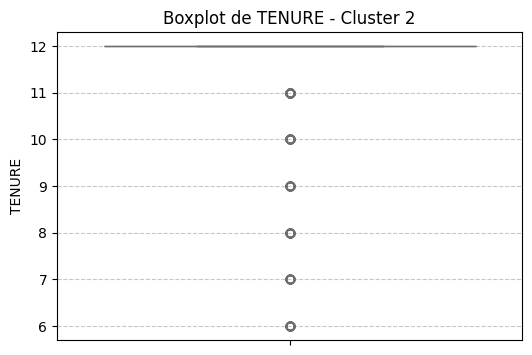

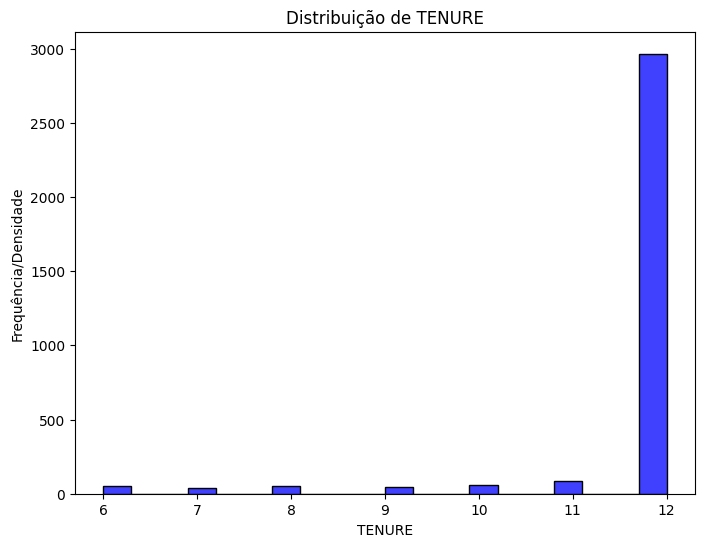

In [11]:
# Filtrar apenas os dados do Cluster 0
cluster_2 = data_with_clusters[data_with_clusters["Cluster"] == 2]

# Selecionar apenas as colunas numéricas (excluindo "Cluster" e "CUST_ID")
colunas_numericas = cluster_2.drop(columns=["Cluster", "CUST_ID"], errors="ignore").columns

# Iterar sobre cada coluna numérica
for coluna in colunas_numericas:
    print(f"\n📊 Estatísticas para {coluna}:\n")
    print(cluster_2[coluna].describe().round(1))  # Arredonda para 1 casa decimal

    # Criar o boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=cluster_2[coluna], color="skyblue")
    plt.title(f"Boxplot de {coluna} - Cluster 2")
    plt.ylabel(coluna)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Criar o histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(cluster_2[coluna], kde=False, bins=20, color='blue')
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência/Densidade')
    plt.show()

# Identificação dos Tipos de Clientes Chave


📊 Estatísticas para BALANCE:

count    8950.0
mean     1564.5
std      2081.5
min         0.0
25%       128.3
50%       873.4
75%      2054.1
max     19043.1
Name: BALANCE, dtype: float64


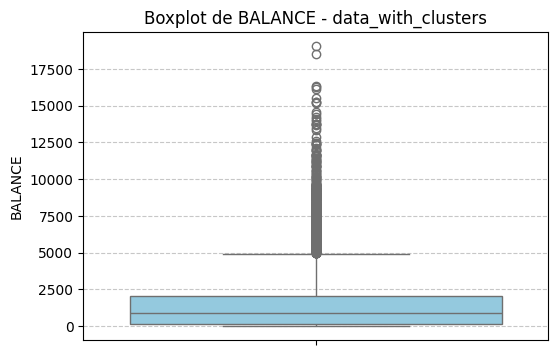

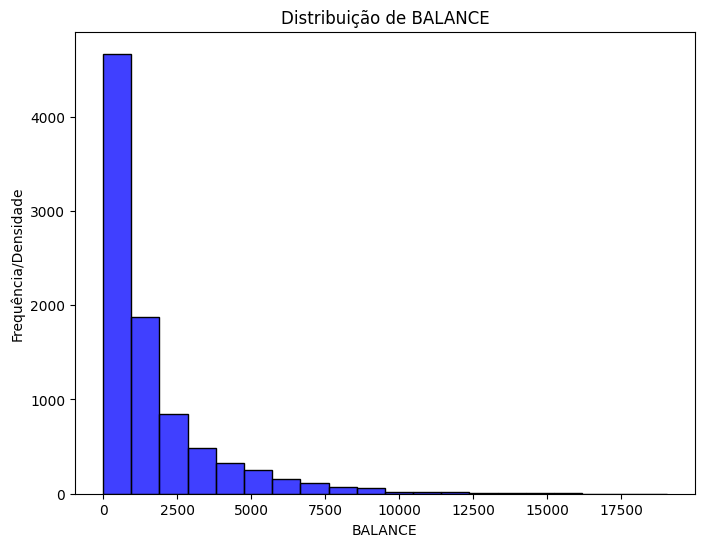


📊 Estatísticas para BALANCE_FREQUENCY:

count   8950.0
mean       0.9
std        0.2
min        0.0
25%        0.9
50%        1.0
75%        1.0
max        1.0
Name: BALANCE_FREQUENCY, dtype: float64


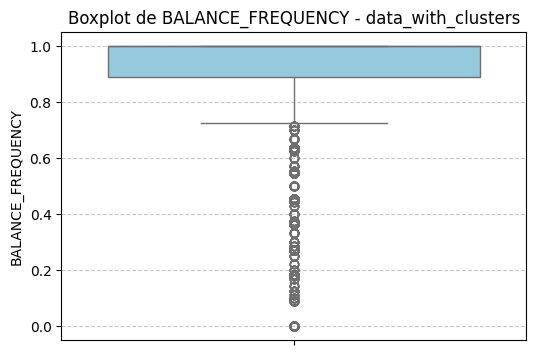

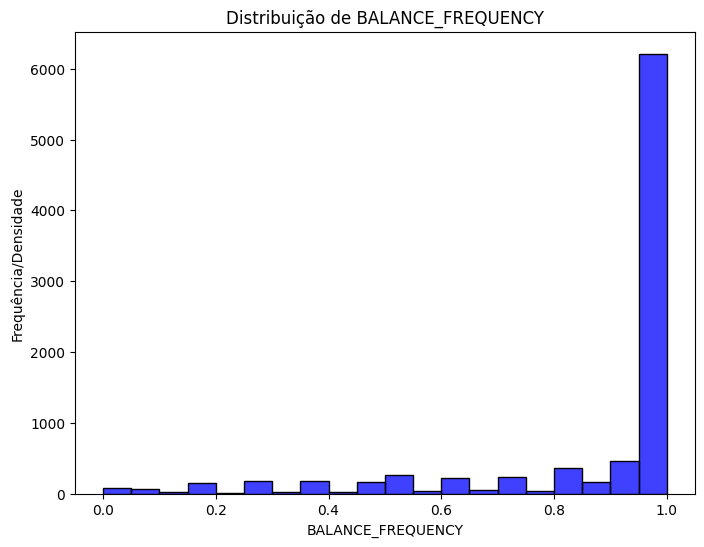


📊 Estatísticas para PURCHASES:

count    8950.0
mean     1003.2
std      2136.6
min         0.0
25%        39.6
50%       361.3
75%      1110.1
max     49039.6
Name: PURCHASES, dtype: float64


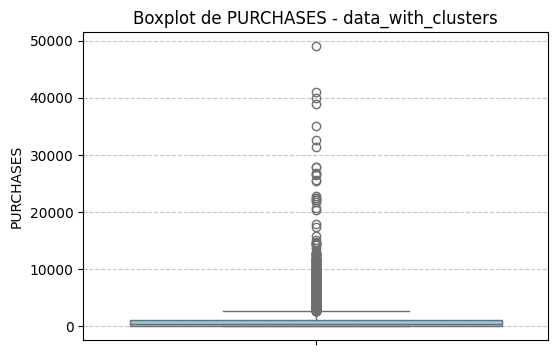

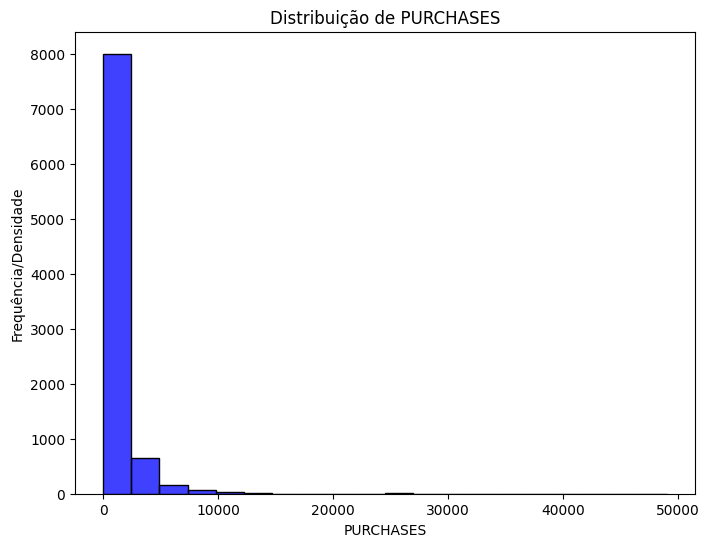


📊 Estatísticas para ONEOFF_PURCHASES:

count    8950.0
mean      592.4
std      1659.9
min         0.0
25%         0.0
50%        38.0
75%       577.4
max     40761.2
Name: ONEOFF_PURCHASES, dtype: float64


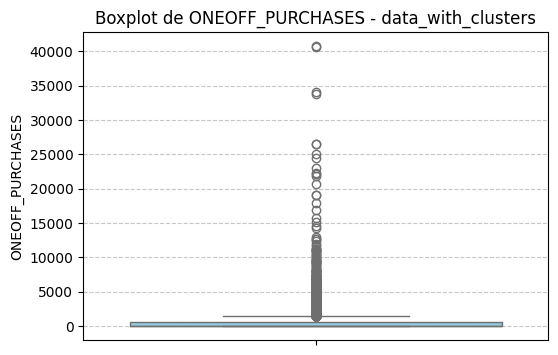

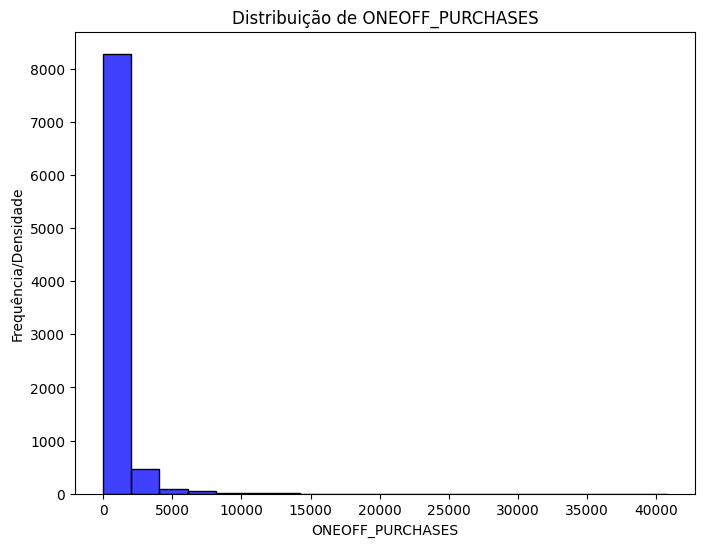


📊 Estatísticas para INSTALLMENTS_PURCHASES:

count    8950.0
mean      411.1
std       904.3
min         0.0
25%         0.0
50%        89.0
75%       468.6
max     22500.0
Name: INSTALLMENTS_PURCHASES, dtype: float64


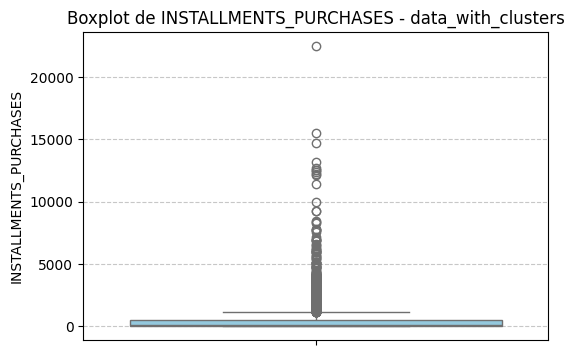

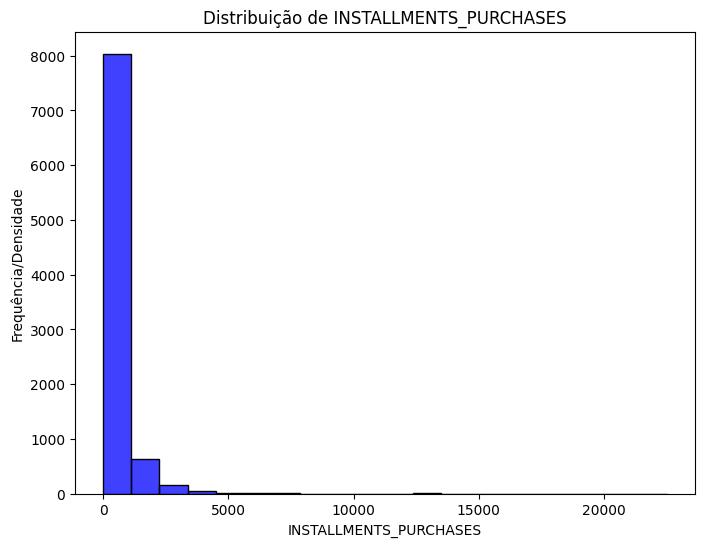


📊 Estatísticas para CASH_ADVANCE:

count    8950.0
mean      978.9
std      2097.2
min         0.0
25%         0.0
50%         0.0
75%      1113.8
max     47137.2
Name: CASH_ADVANCE, dtype: float64


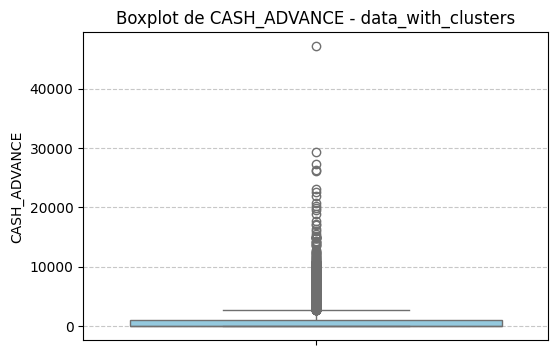

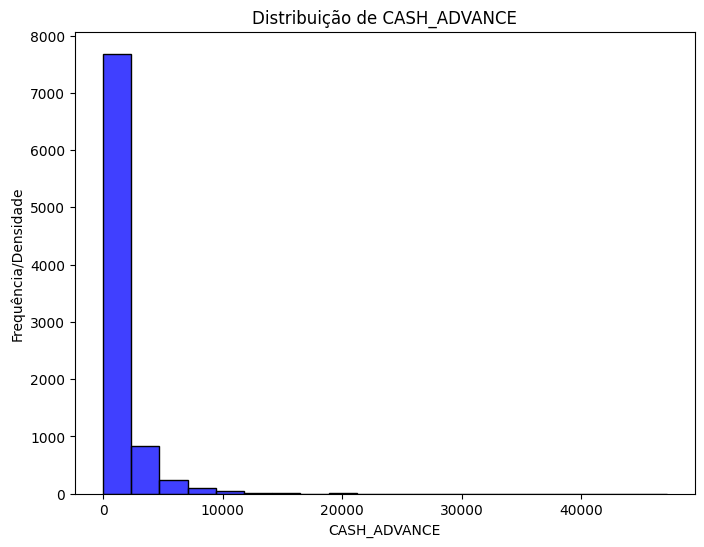


📊 Estatísticas para PURCHASES_FREQUENCY:

count   8950.0
mean       0.5
std        0.4
min        0.0
25%        0.1
50%        0.5
75%        0.9
max        1.0
Name: PURCHASES_FREQUENCY, dtype: float64


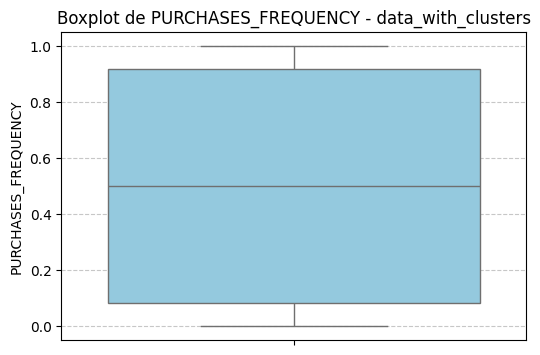

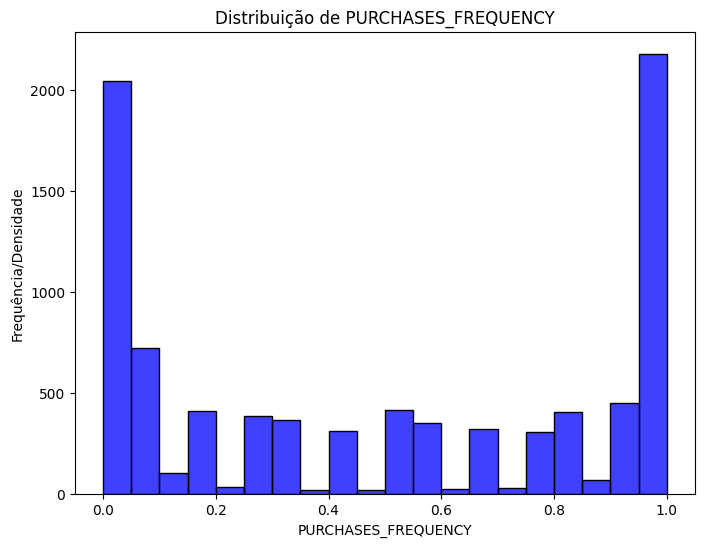


📊 Estatísticas para ONEOFF_PURCHASES_FREQUENCY:

count   8950.0
mean       0.2
std        0.3
min        0.0
25%        0.0
50%        0.1
75%        0.3
max        1.0
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64


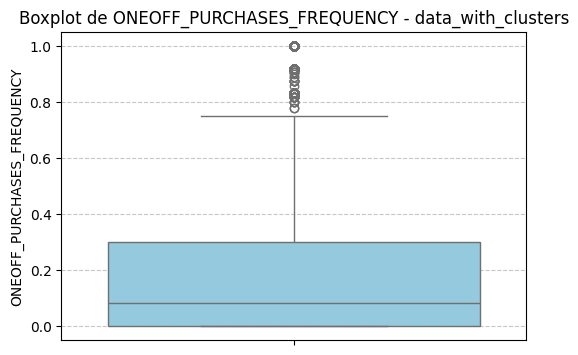

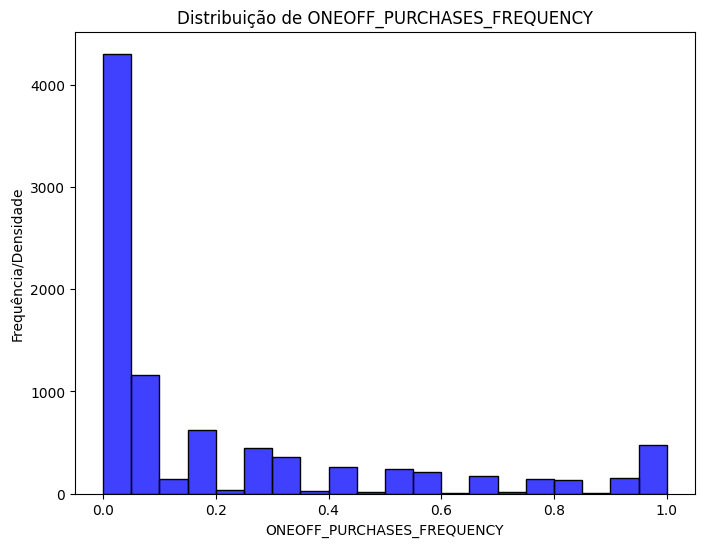


📊 Estatísticas para PURCHASES_INSTALLMENTS_FREQUENCY:

count   8950.0
mean       0.4
std        0.4
min        0.0
25%        0.0
50%        0.2
75%        0.8
max        1.0
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64


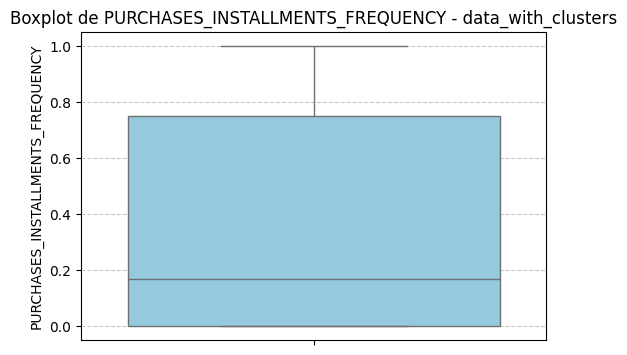

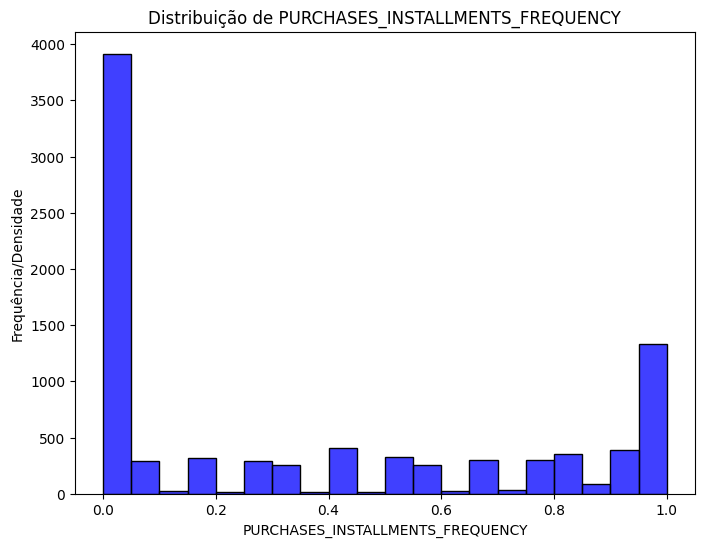


📊 Estatísticas para CASH_ADVANCE_FREQUENCY:

count   8950.0
mean       0.1
std        0.2
min        0.0
25%        0.0
50%        0.0
75%        0.2
max        1.5
Name: CASH_ADVANCE_FREQUENCY, dtype: float64


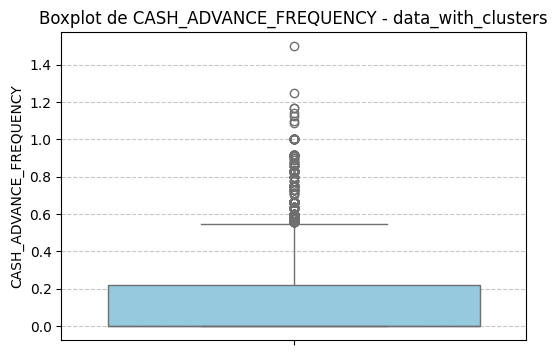

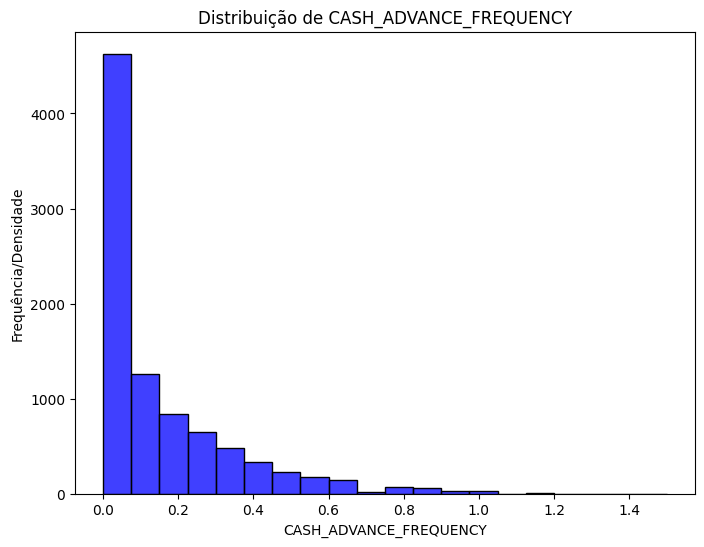


📊 Estatísticas para CASH_ADVANCE_TRX:

count   8950.0
mean       3.2
std        6.8
min        0.0
25%        0.0
50%        0.0
75%        4.0
max      123.0
Name: CASH_ADVANCE_TRX, dtype: float64


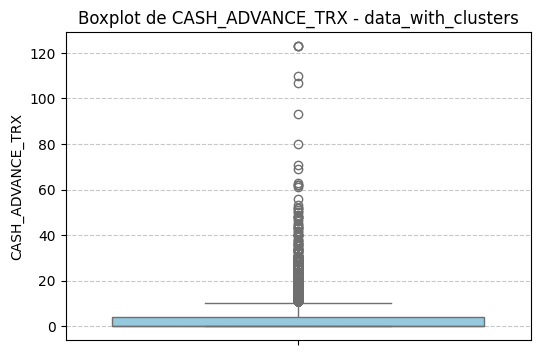

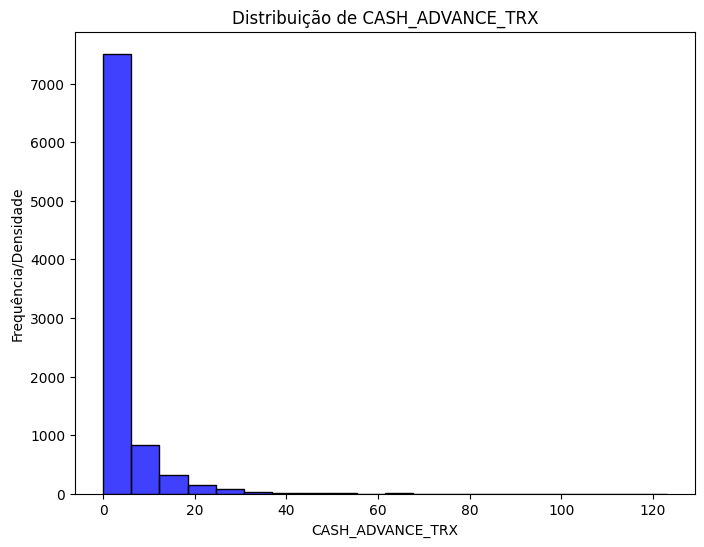


📊 Estatísticas para PURCHASES_TRX:

count   8950.0
mean      14.7
std       24.9
min        0.0
25%        1.0
50%        7.0
75%       17.0
max      358.0
Name: PURCHASES_TRX, dtype: float64


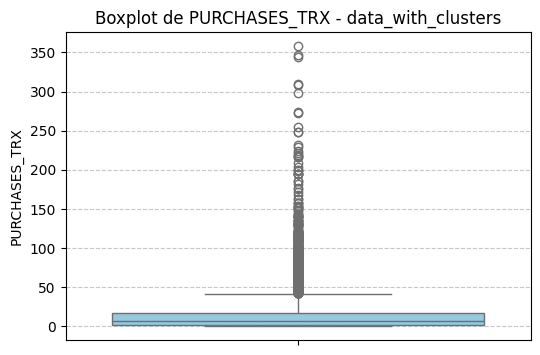

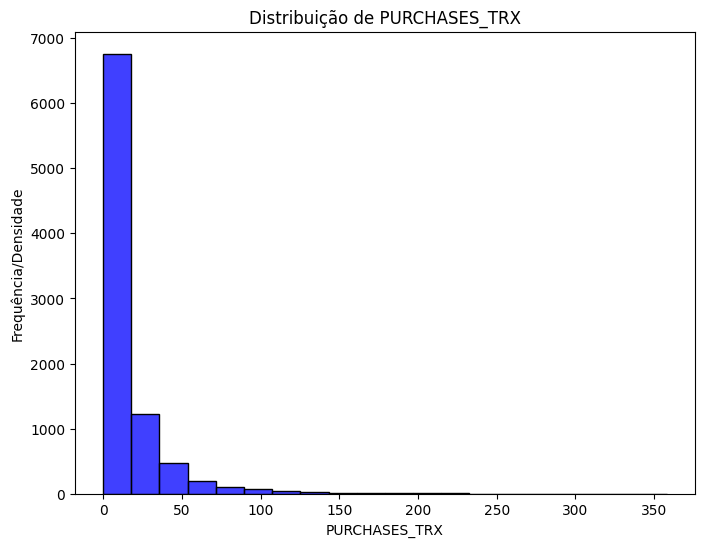


📊 Estatísticas para CREDIT_LIMIT:

count    8950.0
mean     4494.3
std      3638.6
min        50.0
25%      1600.0
50%      3000.0
75%      6500.0
max     30000.0
Name: CREDIT_LIMIT, dtype: float64


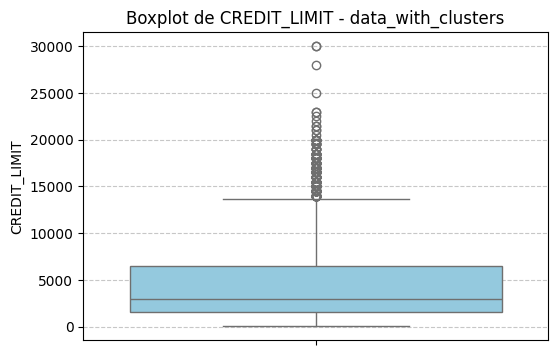

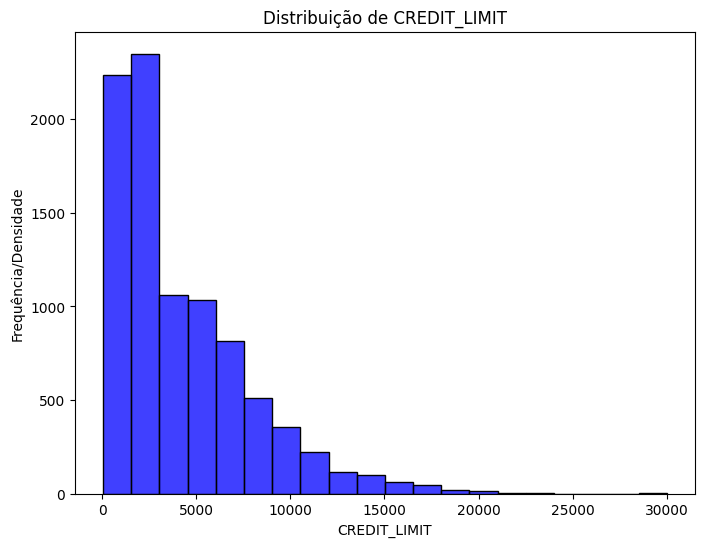


📊 Estatísticas para PAYMENTS:

count    8950.0
mean     1733.1
std      2895.1
min         0.0
25%       383.3
50%       856.9
75%      1901.1
max     50721.5
Name: PAYMENTS, dtype: float64


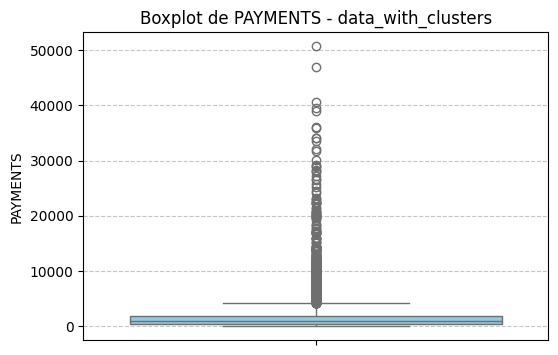

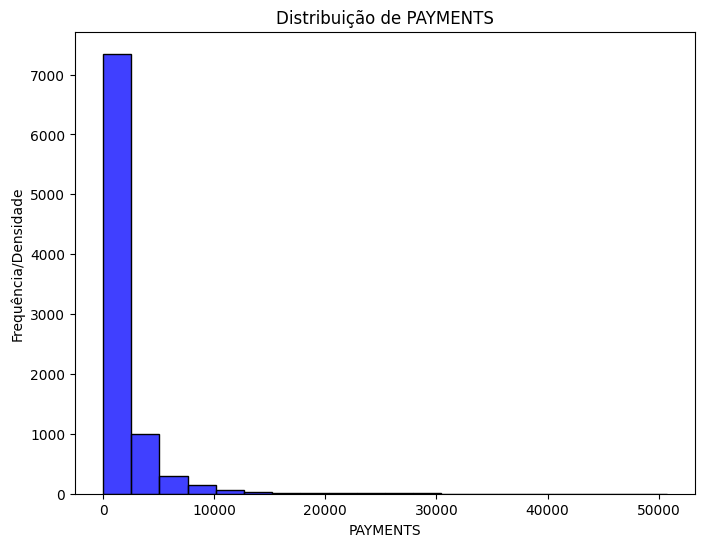


📊 Estatísticas para MINIMUM_PAYMENTS:

count    8950.0
mean      844.5
std      2332.9
min         0.0
25%       170.9
50%       299.4
75%       788.7
max     76406.2
Name: MINIMUM_PAYMENTS, dtype: float64


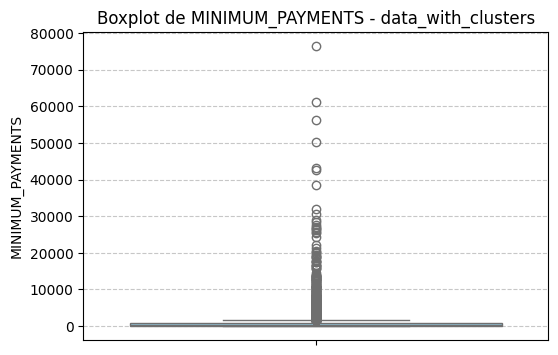

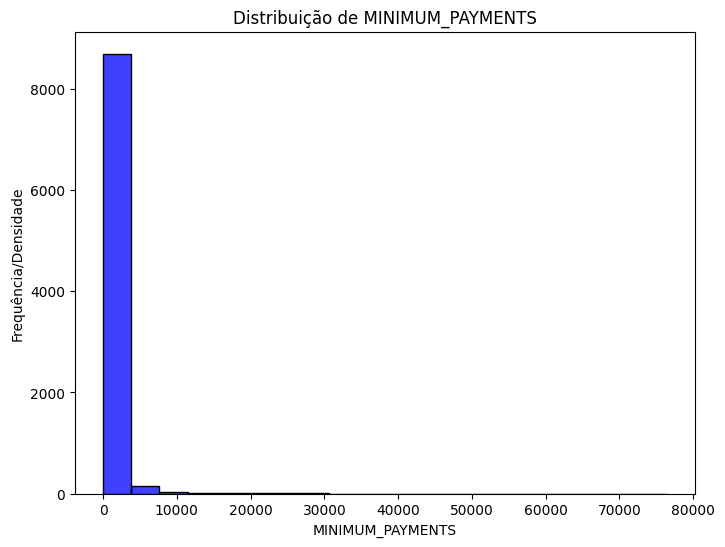


📊 Estatísticas para PRC_FULL_PAYMENT:

count   8950.0
mean       0.2
std        0.3
min        0.0
25%        0.0
50%        0.0
75%        0.1
max        1.0
Name: PRC_FULL_PAYMENT, dtype: float64


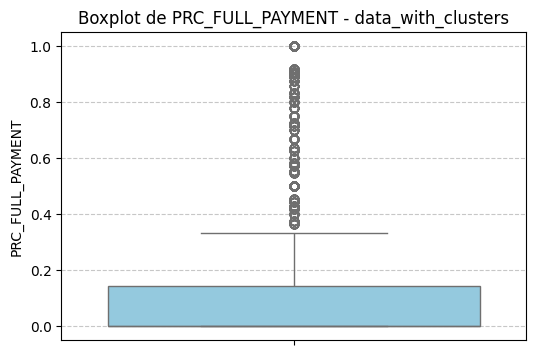

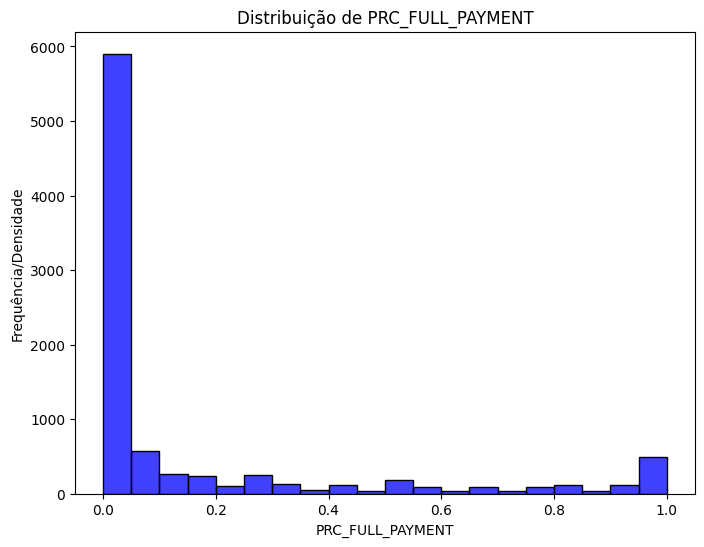


📊 Estatísticas para TENURE:

count   8950.0
mean      11.5
std        1.3
min        6.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
Name: TENURE, dtype: float64


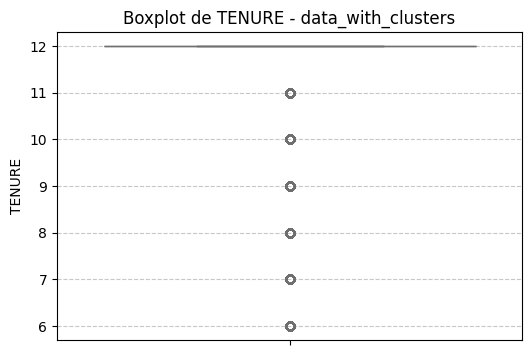

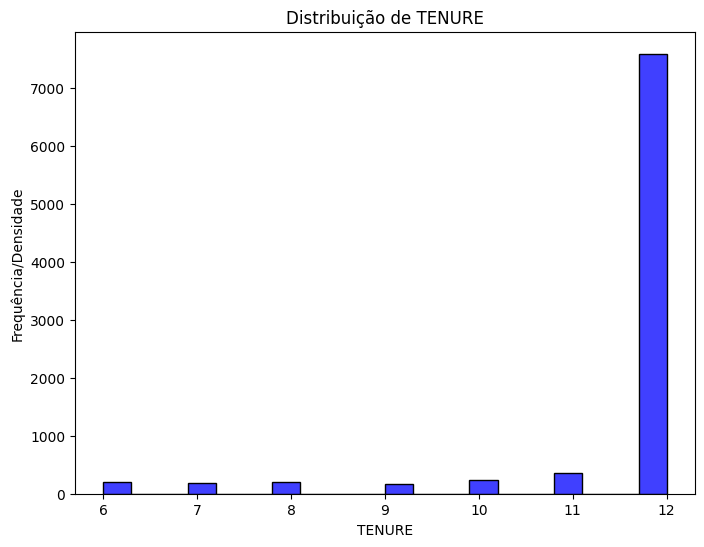

In [12]:
# Selecionar apenas as colunas numéricas (excluindo "Cluster" e "CUST_ID")
colunas_numericas = data_with_clusters.drop(columns=["Cluster", "CUST_ID"], errors="ignore").columns

# Iterar sobre cada coluna numérica
for coluna in colunas_numericas:
    print(f"\n📊 Estatísticas para {coluna}:\n")
    print(data_with_clusters[coluna].describe().round(1))  # Arredonda para 1 casa decimal

    # Criar o boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data_with_clusters[coluna], color="skyblue")
    plt.title(f"Boxplot de {coluna} - data_with_clusters")
    plt.ylabel(coluna)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Criar o histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(data_with_clusters[coluna], kde=False, bins=20, color='blue')
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência/Densidade')
    plt.show()

In [13]:
# Filtrar clientes de alto valor
clientes_alto_valor = data_with_clusters[
    (data_with_clusters["PURCHASES"] > 2000) &  # Gastam bastante
    (data_with_clusters["PURCHASES_FREQUENCY"] >= 0.8) &  # Compram frequentemente
    (data_with_clusters["CASH_ADVANCE_FREQUENCY"] == 0) &  # Não fazem saques emergenciais
    (data_with_clusters["CREDIT_LIMIT"] >= 7000) #&  # Têm um bom limite
    #(data_with_clusters["BALANCE"] >= 4000)  # Mantêm um saldo disponível alto
]

# Filtrar clientes com risco de inadimplência
clientes_risco_inadimplencia = data_with_clusters[
    #(data_with_clusters["BALANCE"] < 1000) &  # Saldo disponível muito baixo (já gastou quase tudo)
    (data_with_clusters["CASH_ADVANCE"] > 2000) &  # Usa muito adiantamento em dinheiro (indicador de emergência financeira)
    (data_with_clusters["PRC_FULL_PAYMENT"] == 0) &  # Nunca paga a fatura integral
    (data_with_clusters["MINIMUM_PAYMENTS"] > 1000)  # Está pagando apenas o mínimo, mas valores altos
]

# Filtrar clientes com risco de churn ou com baixo engajamento
clientes_risco_churn = data_with_clusters[
    (data_with_clusters["PURCHASES"] < 500) &  # Quase não compra
    (data_with_clusters["PURCHASES_FREQUENCY"] < 0.3) &  # Frequência de compras muito baixa
    (data_with_clusters["CREDIT_LIMIT"] > 7000) &  # Tem um limite alto, mas não usa
    (data_with_clusters["BALANCE"] > 4000) &  # Tem muito saldo disponível (não precisa do cartão)
    (data_with_clusters["TENURE"] == 12)  # Já está há um tempo na base, mas sem engajamento
]

# Filtrar clientes que não se encaixam em nenhuma das categorias
clientes_nao_classificados = data_with_clusters[
    ~data_with_clusters.index.isin(clientes_alto_valor.index) &
    ~data_with_clusters.index.isin(clientes_risco_inadimplencia.index) &
    ~data_with_clusters.index.isin(clientes_risco_churn.index)
]

# Exibir a quantidade de clientes por categoria
print(f"Clientes de Alto Valor: {clientes_alto_valor.shape[0]}")
print(f"Clientes com Risco de Inadimplência: {clientes_risco_inadimplencia.shape[0]}")
print(f"Clientes com Risco de Churn: {clientes_risco_churn.shape[0]}")
print(f"Clientes Não Classificados: {clientes_nao_classificados.shape[0]}")


# Contar a quantidade total de clientes no dataset
total_clientes = data_with_clusters.shape[0]

# Criar um dicionário para armazenar as porcentagens por cluster dentro de cada categoria
categorias = {
    "Clientes de Alto Valor": clientes_alto_valor,
    "Clientes com Risco de Inadimplência": clientes_risco_inadimplencia,
    "Clientes com Risco de Churn": clientes_risco_churn,
    "Clientes Não Classificados": clientes_nao_classificados
}

# Exibir a quantidade total de clientes por categoria
print(f"Clientes de Alto Valor: {clientes_alto_valor.shape[0]} ({(clientes_alto_valor.shape[0] / total_clientes) * 100:.2f}%)")
print(f"Clientes com Risco de Inadimplência: {clientes_risco_inadimplencia.shape[0]} ({(clientes_risco_inadimplencia.shape[0] / total_clientes) * 100:.2f}%)")
print(f"Clientes com Risco de Churn: {clientes_risco_churn.shape[0]} ({(clientes_risco_churn.shape[0] / total_clientes) * 100:.2f}%)")
print(f"Clientes Não Classificados: {clientes_nao_classificados.shape[0]} ({(clientes_nao_classificados.shape[0] / total_clientes) * 100:.2f}%)\n")

# Exibir a distribuição dos clusters dentro de cada categoria
for categoria, df in categorias.items():
    print(f"\nDistribuição dos Clusters em {categoria}:")
    cluster_counts = df["Cluster"].value_counts(normalize=True) * 100  # Conta e converte para porcentagem
    print(cluster_counts.to_string())  # Exibe os clusters e suas porcentagens

Clientes de Alto Valor: 330
Clientes com Risco de Inadimplência: 632
Clientes com Risco de Churn: 237
Clientes Não Classificados: 7916
Clientes de Alto Valor: 330 (3.69%)
Clientes com Risco de Inadimplência: 632 (7.06%)
Clientes com Risco de Churn: 237 (2.65%)
Clientes Não Classificados: 7916 (88.45%)


Distribuição dos Clusters em Clientes de Alto Valor:
Cluster
2   92.7
0    7.3

Distribuição dos Clusters em Clientes com Risco de Inadimplência:
Cluster
0   90.0
2    5.2
1    4.7

Distribuição dos Clusters em Clientes com Risco de Churn:
Cluster
0   96.6
1    3.4

Distribuição dos Clusters em Clientes Não Classificados:
Cluster
1   52.8
2   37.4
0    9.8
